#Проект для фонда "Простые вещи"

Автор: Шипилина Анна

Цель - провести анализ пожертвований фонду "Простые вещи", создать аналитическую панель, которая будет содержать информацию о поведении пользователей и их лояльности к фонду.


Ссылка на дашборд https://public.tableau.com/views/Simple_things_dashboard/sheet36?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

**План работы:**
1.	Проведение предобработки
  - корректировка типов данных
  - оценка/заполнение пропусков
  - проверка на наличие дубликатов
  - добавление новых столбцов
2. Исследовательский анализ
  	- оценка отклоненных операций
  	- оценка завершенных операций
3. Сегментация клиентов. RFM анализ
4. Когортный анализ (Retention rate, Lifetime value)
5. Маркетинговый анализ


##Загрузка и оценка данных

Список столбцов (из исходных данных и их новые названия)
   -  **Номер:id** - Идентификатор действия
   -  **Дата и время: action_date** - Дата совершения платежа,
   - **Банк: bank** - Название банка,
   - **Сайт: site** - Сайт перехода,
   -**Номер заказа, '# заказа': order_id** - Идентификатор заказа,
   - **ID плательщика, Плательщик: customer** - Идентификатор плательщика,
   - **Тип: type** - Тип платежа,
   - **Сумма операции: operation_sum** - Сумма платежа,
   - **Валюта, Валюта операции: operation_currency** - Валюта платежа,
   - **Сумма комиссии: comission_sum** - Сумма комиссии,
   - **Сумма возмещения: final_sum** - Итоговая сумма платежа,
   - **Валюта возмещения: final_currency** - Итоговая валюта,
   - **Дата возмещения: final_date** - Итоговая дата платежа,
   - **Дата/время создания: creation_date** - Дата и время создания транзакции,
   - **Статус, Статус операции: status** - Статус платежа,
   - **% комиссии: comission_%** - Процент комиссии,
   - **Назначение платежа: aim**,
   - **Город: city**

In [1]:
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from datetime import datetime, timedelta

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


**Ссылки на данные скрыты.**

Скрытый код:

          file_urls = ['https://drive.google.com',
                        'https://drive.google.com'
          ]

          for url in file_urls:
              gdown.download(url, quiet=False)

In [2]:
# @title
file_urls = [
    'https://drive.google.com/uc?export=download&id=1INqYNIY7zPuiGeNhqoDsP-w7hu2OY9H5',
    'https://drive.google.com/uc?export=download&id=1bG4ccvL2MvqGshQM_pstnyO_D-lbjbjV',
    'https://drive.google.com/uc?export=download&id=1W4xnIhi-34nCaJS4iWuMBbGv-V8ZCoPx',
    'https://drive.google.com/uc?export=download&id=1_P7ByG3JoMynQRhNXitOCN0Kf_oCyVO_',
    'https://drive.google.com/uc?export=download&id=18UGksVK0rlmD82LKKeipXqNldlkFGDYy',
    'https://drive.google.com/uc?export=download&id=1Fe04Ch4dDo2ldd-tPRzH_FCoC6xjglU6',
    'https://drive.google.com/uc?export=download&id=1Qc9T3Fx-E90LBQcre89C_8qbUK4yHCJs'
]


for url in file_urls:
    gdown.download(url, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1INqYNIY7zPuiGeNhqoDsP-w7hu2OY9H5
To: /content/январь.xls
100%|██████████| 113k/113k [00:00<00:00, 9.13MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1bG4ccvL2MvqGshQM_pstnyO_D-lbjbjV
To: /content/февраль.xls
100%|██████████| 114k/114k [00:00<00:00, 13.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1W4xnIhi-34nCaJS4iWuMBbGv-V8ZCoPx
To: /content/март.xls
100%|██████████| 183k/183k [00:00<00:00, 21.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1_P7ByG3JoMynQRhNXitOCN0Kf_oCyVO_
To: /content/апрель.xls
100%|██████████| 191k/191k [00:00<00:00, 44.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=18UGksVK0rlmD82LKKeipXqNldlkFGDYy
To: /content/май.xls
100%|██████████| 350k/350k [00:00<00:00, 13.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1Fe04Ch4dDo2ldd-tPRzH_FCoC6xjglU6
To: /content/июн

In [3]:
# Список месяцев для имен файлов и датафреймов
months = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль']

# Словарь, в котором будут храниться датафреймы
dfs = {}

# Читаем файлы в цикле и сохраняем в словарь
for month in months:
    file_name = f'{month}.xls'  # Формируем имя файла
    dfs[month] = pd.read_excel(file_name)  # Читаем файл и сохраняем в словарь
    print(f'Файл {file_name} загружен.')  # Выводим информацию о загрузке

# Теперь можно обращаться к датафреймам через словарь, например:
display(dfs['январь'].head())  # Выведет первые строки датафрейма за январь

Файл январь.xls загружен.
Файл февраль.xls загружен.
Файл март.xls загружен.
Файл апрель.xls загружен.
Файл май.xls загружен.
Файл июнь.xls загружен.
Файл июль.xls загружен.


Номер         Дата и время      Банк              Сайт  # заказа  \
0  2080468405  2024-01-31 20:18:00  Тинькофф  prostieveschi.ru       NaN   
1  2080039460  2024-01-30 22:18:00  Тинькофф  prostieveschi.ru       NaN   
2  2079851261  2024-01-30 14:55:00  Тинькофф  prostieveschi.ru       NaN   
3  2079846986  2024-01-30 14:45:00  Тинькофф  prostieveschi.ru       NaN   
4  2079829457  2024-01-30 14:09:00  Тинькофф  prostieveschi.ru       NaN   

        ID плательщика                Тип  Сумма операции Валюта  \
0    12ost****@mail.ru  Регулярная оплата            1000    RUB   
1  tigro****@gmail.com  Регулярная оплата             200    RUB   
2    nat****@gmail.com  Регулярная оплата             300    RUB   
3  natalk****@inbox.ru  Регулярная оплата             700    RUB   
4     in****@yandex.ru  Регулярная оплата             500    RUB   

   Сумма комиссии  Сумма возмещения Валюта возмещения Дата возмещения  \
0            32.0             968.0               RUB      2024-02-01   
1             6.4             193.6               RUB      2024-01-31   
2             9.6             290.4               RUB      2024-01-31   
3            22.4             677.6               RUB      2024-01-31   
4            16.0             484.0               RUB      2024-01-31   

      Статус  % комиссии      Часовой пояс UTC/GMT  
0  Завершена         3.2  +3 UTC/GMT Europe/Moscow  
1  Завершена         3.2  +3 UTC/GMT Europe/Moscow  
2  Завершена         3.2  +3 UTC/GMT Europe/Moscow  
3  Завершена         3.2  +3 UTC/GMT Europe/Moscow  
4  Завершена         3.2  +3 UTC/GMT Europe/Moscow

In [4]:
#Посмотрим названия столбцов
for month, df in dfs.items():
    print(f"{month}: {df.columns.tolist()}")

январь: ['Номер', 'Дата и время', 'Банк', 'Сайт', '# заказа', 'ID плательщика', 'Тип', 'Сумма операции', 'Валюта', 'Сумма комиссии', 'Сумма возмещения', 'Валюта возмещения', 'Дата возмещения', 'Статус', '% комиссии', 'Часовой пояс UTC/GMT']
февраль: ['Номер', 'Дата и время', 'Банк', 'Сайт', '# заказа', 'ID плательщика', 'Тип', 'Сумма операции', 'Валюта', 'Сумма комиссии', 'Сумма возмещения', 'Валюта возмещения', 'Дата возмещения', 'Статус', '% комиссии', 'Часовой пояс UTC/GMT']
март: ['Номер', 'Дата и время', 'Банк', 'Сайт', 'Номер заказа', 'Плательщик', 'Тип', 'Сумма операции', 'Валюта операции', 'Сумма комиссии', 'Сумма возмещения', 'Валюта возмещения', 'Дата возмещения', 'Статус операции', 'Назначение платежа', '% комиссии', 'Произвольное поле (имя)', 'Произвольное поле (значение)', 'Дата/время создания', 'Платежная система', 'Карта', 'Срок действия', 'Эмитент', 'Страна эмитента карты', 'Адрес', 'Примечание']
апрель: ['Номер', 'Дата и время', 'Банк', 'Сайт', 'Номер заказа', 'Платель

In [5]:
#Переименуем нужные нам столбцы во всех таблицах
new_column_names = {
    'Номер': 'id',
    'Дата и время': 'action_date',
    'Банк': 'bank',
    'Сайт': 'site',
    'Номер заказа': 'order_id',
    '# заказа': 'order_id',
    'ID плательщика': 'customer',
    'Плательщик': 'customer',
    'Тип': 'type',
    'Сумма операции': 'operation_sum',
    'Валюта': 'operation_currency',
    'Валюта операции': 'operation_currency',
    'Сумма комиссии': 'comission_sum',
    'Сумма возмещения': 'final_sum',
    'Валюта возмещения': 'final_currency',
    'Дата возмещения': 'final_date',
    'Дата/время создания': 'creation_date',
    'Статус': 'status',
    'Статус операции': 'status',
    '% комиссии': 'comission_%',
    'Назначение платежа': 'aim',
    'Город': 'city',
    'Примечание' : 'payment_status'
}

for month in months:
    dfs[month] = dfs[month].rename(columns=new_column_names)

In [6]:
#Проверим как прошло переименование
for month, df in dfs.items():
    print(f'{month}: {df.columns.tolist()}')

январь: ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum', 'final_currency', 'final_date', 'status', 'comission_%', 'Часовой пояс UTC/GMT']
февраль: ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum', 'final_currency', 'final_date', 'status', 'comission_%', 'Часовой пояс UTC/GMT']
март: ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum', 'final_currency', 'final_date', 'status', 'aim', 'comission_%', 'Произвольное поле (имя)', 'Произвольное поле (значение)', 'creation_date', 'Платежная система', 'Карта', 'Срок действия', 'Эмитент', 'Страна эмитента карты', 'Адрес', 'payment_status']
апрель: ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum', '

In [7]:
#Выведем общую информацию
for month, df in dfs.items():
  print(f'{month}: количество строк {df.shape[0]}, количество столбцов {df.shape[1]}')

январь: количество строк 335, количество столбцов 16
февраль: количество строк 338, количество столбцов 16
март: количество строк 401, количество столбцов 26
апрель: количество строк 394, количество столбцов 28
май: количество строк 688, количество столбцов 31
июнь: количество строк 1163, количество столбцов 23
июль: количество строк 829, количество столбцов 42


In [8]:
#Оставим только нужные столбцы
needed_columns = ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum',
                  'final_currency', 'final_date', 'creation_date', 'status', 'comission_%', 'city', 'payment_status']
for month in months:
  dfs[month] = dfs[month][[col for col in needed_columns if col in dfs[month].columns]]

In [9]:
#Проверим
for month, df in dfs.items():
    print(f'{month}: {df.columns.tolist()}')

январь: ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum', 'final_currency', 'final_date', 'status', 'comission_%']
февраль: ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum', 'final_currency', 'final_date', 'status', 'comission_%']
март: ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum', 'final_currency', 'final_date', 'creation_date', 'status', 'comission_%', 'payment_status']
апрель: ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum', 'final_currency', 'final_date', 'creation_date', 'status', 'comission_%', 'payment_status']
май: ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type', 'operation_sum', 'operation_currency', 

In [10]:
for month, df in dfs.items():
  print(f'{month}: количество строк {df.shape[0]}, количество столбцов {df.shape[1]}')

январь: количество строк 335, количество столбцов 15
февраль: количество строк 338, количество столбцов 15
март: количество строк 401, количество столбцов 17
апрель: количество строк 394, количество столбцов 17
май: количество строк 688, количество столбцов 16
июнь: количество строк 1163, количество столбцов 17
июль: количество строк 829, количество столбцов 18


In [11]:
#Объединим все датафреймы в один
data = pd.concat(dfs.values(), ignore_index=True, sort=False)

In [12]:
#Функция для отображения информации о датасете
def about_data(insert_df):

  display(insert_df.head())
  print()
  print('------'*15)
  print('Информация о датасете:')
  print(f'В датафрейме {insert_df.shape[0]} строк и {insert_df.shape[1]} столбцов')
  print('------'*15)
  print()
  print(insert_df.info())
  print()
  print('------'*15)
  print('Пропуски в датафрейме:')
  display(insert_df.isna().sum())
  print('------'*15)
  display(insert_df.describe(include='all'))

In [13]:
about_data(data)

id          action_date      bank              site  order_id  \
0  2080468405  2024-01-31 20:18:00  Тинькофф  prostieveschi.ru       NaN   
1  2080039460  2024-01-30 22:18:00  Тинькофф  prostieveschi.ru       NaN   
2  2079851261  2024-01-30 14:55:00  Тинькофф  prostieveschi.ru       NaN   
3  2079846986  2024-01-30 14:45:00  Тинькофф  prostieveschi.ru       NaN   
4  2079829457  2024-01-30 14:09:00  Тинькофф  prostieveschi.ru       NaN   

              customer               type  operation_sum operation_currency  \
0    12ost****@mail.ru  Регулярная оплата           1000                RUB   
1  tigro****@gmail.com  Регулярная оплата            200                RUB   
2    nat****@gmail.com  Регулярная оплата            300                RUB   
3  natalk****@inbox.ru  Регулярная оплата            700                RUB   
4     in****@yandex.ru  Регулярная оплата            500                RUB   

   comission_sum  final_sum final_currency final_date     status  comission_%  \
0           32.0      968.0            RUB 2024-02-01  Завершена          3.2   
1            6.4      193.6            RUB 2024-01-31  Завершена          3.2   
2            9.6      290.4            RUB 2024-01-31  Завершена          3.2   
3           22.4      677.6            RUB 2024-01-31  Завершена          3.2   
4           16.0      484.0            RUB 2024-01-31  Завершена          3.2   

  creation_date payment_status city  
0           NaT            NaN  NaN  
1           NaT            NaN  NaN  
2           NaT            NaN  NaN  
3           NaT            NaN  NaN  
4           NaT            NaN  NaN


------------------------------------------------------------------------------------------
Информация о датасете:
В датафрейме 4148 строк и 18 столбцов
------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  4148 non-null   int64         
 1   action_date         3496 non-null   object        
 2   bank                4148 non-null   object        
 3   site                4148 non-null   object        
 4   order_id            1281 non-null   float64       
 5   customer            4147 non-null   object        
 6   type                4148 non-null   object        
 7   operation_sum       4148 non-null   int64         
 8   operation_currency  4148 non-null   object        
 9   comission_sum       4086 no

id                       0
action_date            652
bank                     0
site                     0
order_id              2867
customer                 1
type                     0
operation_sum            0
operation_currency       0
comission_sum           62
final_sum               62
final_currency          62
final_date             735
status                   0
comission_%              0
creation_date         1836
payment_status         673
city                  3374
dtype: int64

------------------------------------------------------------------------------------------


id action_date      bank              site      order_id  \
count   4.148000e+03        3496      4148              4148  1.281000e+03   
unique           NaN        3274         1                 1           NaN   
top              NaN              Тинькофф  prostieveschi.ru           NaN   
freq             NaN         169      4148              4148           NaN   
mean    2.110393e+09         NaN       NaN               NaN  7.464910e+05   
min     2.066542e+09         NaN       NaN               NaN  1.963800e+04   
25%     2.103720e+09         NaN       NaN               NaN  2.121500e+04   
50%     2.116676e+09         NaN       NaN               NaN  2.166900e+04   
75%     2.121165e+09         NaN       NaN               NaN  2.225700e+04   
max     2.127167e+09         NaN       NaN               NaN  5.154085e+08   
std     1.559862e+07         NaN       NaN               NaN  1.618153e+07   

                       customer               type  operation_sum  \
count                      4147               4148    4148.000000   
unique                     1525                  3            NaN   
top     pollygotl****@gmail.com  Регулярная оплата            NaN   
freq                         23               2858            NaN   
mean                        NaN                NaN     728.756509   
min                         NaN                NaN       1.000000   
25%                         NaN                NaN     200.000000   
50%                         NaN                NaN     500.000000   
75%                         NaN                NaN     500.000000   
max                         NaN                NaN   50000.000000   
std                         NaN                NaN    2447.211840   

       operation_currency  comission_sum     final_sum final_currency  \
count                4148    4086.000000   4086.000000           4086   
unique                  4            NaN           NaN              1   
top                   RUB            NaN           NaN            RUB   
freq                 4122            NaN           NaN           4086   
mean                  NaN      20.123275    601.573250            NaN   
min                   NaN       0.500000     -0.500000            NaN   
25%                   NaN       3.900000     96.100000            NaN   
50%                   NaN       9.600000    290.400000            NaN   
75%                   NaN      16.000000    484.000000            NaN   
max                   NaN    1600.000000  48400.000000            NaN   
std                   NaN      69.925440   2117.092242            NaN   

                           final_date     status  comission_%  \
count                            3413       4148  4148.000000   
unique                            NaN          4          NaN   
top                               NaN  Completed          NaN   
freq                              NaN       2823          NaN   
mean    2024-05-10 16:11:40.380896512        NaN     3.169986   
min               2024-01-09 00:00:00        NaN     0.000000   
25%               2024-03-15 00:00:00        NaN     3.200000   
50%               2024-06-10 00:00:00        NaN     3.200000   
75%               2024-07-01 00:00:00        NaN     3.200000   
max               2024-08-01 00:00:00        NaN     3.900000   
std                               NaN        NaN     0.313783   

                        creation_date payment_status    city  
count                            2312           3475     774  
unique                            NaN             15     165  
top                               NaN       Approved  Москва  
freq                              NaN           2823     246  
mean    2024-05-23 11:28:51.565743872            NaN     NaN  
min               2024-03-01 00:23:00            NaN     NaN  
25%               2024-04-13 22:17:30            NaN     NaN  
50%               2024-05-24 20:15:00            NaN     NaN  
75%               2024-07-1

**Вывод:**
Мы загрузили файлы с данными по месяцам, переназвали столбцы, оставили только необходимые для дальнейшего анализа. После чего свели все таблицы в одну общую.
Итого у нас 4148 строк и 17 столбцов.

##Предобработка данных

### Изменение типов данных

В столбце action_date также вместо пропусков - есть пробелы, заменим их на NaN.

In [14]:
data.query('action_date == " "').head()

id action_date      bank              site  order_id  \
256  2080076756              Тинькофф  prostieveschi.ru       NaN   
257  2079609225              Тинькофф  prostieveschi.ru       NaN   
258  2079397292              Тинькофф  prostieveschi.ru       NaN   
259  2079100030              Тинькофф  prostieveschi.ru       NaN   
260  2078923096              Тинькофф  prostieveschi.ru       NaN   

                         customer               type  operation_sum  \
256   feoktistovaan****@gmail.com  Регулярная оплата            500   
257   feoktistovaan****@gmail.com  Регулярная оплата            500   
258           polinch****@list.ru  Регулярная оплата            150   
259  valeriyavarvar****@gmail.com  Регулярная оплата            500   
260           polinch****@list.ru  Регулярная оплата            150   

    operation_currency  comission_sum  final_sum final_currency final_date  \
256                RUB            0.5       -0.5            RUB 2024-02-01   
257                RUB            0.5       -0.5            RUB 2024-01-31   
258                RUB            0.5       -0.5            RUB 2024-01-30   
259                RUB            0.5       -0.5            RUB 2024-01-29   
260                RUB            0.5       -0.5            RUB 2024-01-29   

        status  comission_% creation_date payment_status city  
256  Отклонена          3.2           NaT            NaN  NaN  
257  Отклонена          3.2           NaT            NaN  NaN  
258  Отклонена          3.2           NaT            NaN  NaN  
259  Отклонена          3.2           NaT            NaN  NaN  
260  Отклонена          3.2           NaT            NaN  NaN

In [15]:
#Уберем пробелы из столбца action_date
data['action_date'] = data['action_date'].replace(' ', pd.NA)

In [16]:
data.query('action_date == " "')

Empty DataFrame
Columns: [id, action_date, bank, site, order_id, customer, type, operation_sum, operation_currency, comission_sum, final_sum, final_currency, final_date, status, comission_%, creation_date, payment_status, city]
Index: []

In [17]:
data['action_date'].isna().sum()

821

Итого у нас вместо 652 - 821 пропуск. Позже оценим можно ли их заполнить.

In [18]:
data = data.astype({
    'id' : 'object',
    'action_date' : 'datetime64[ns]',
    'order_id': 'object'
})

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  4148 non-null   object        
 1   action_date         3327 non-null   datetime64[ns]
 2   bank                4148 non-null   object        
 3   site                4148 non-null   object        
 4   order_id            1281 non-null   object        
 5   customer            4147 non-null   object        
 6   type                4148 non-null   object        
 7   operation_sum       4148 non-null   int64         
 8   operation_currency  4148 non-null   object        
 9   comission_sum       4086 non-null   float64       
 10  final_sum           4086 non-null   float64       
 11  final_currency      4086 non-null   object        
 12  final_date          3413 non-null   datetime64[ns]
 13  status              4148 non-null   object      

In [20]:
print('Первая дата в столбце "action_date": ', min(data['action_date']), '\n'
      'Последняя дата в столбце "action_date": ', max(data['action_date']))
print()
print('Первая дата в столбце "final_date": ', min(data['final_date']), '\n'
      'Последняя дата в столбце "final_date": ', max(data['final_date']))


Первая дата в столбце "action_date":  2024-01-01 09:55:00 
Последняя дата в столбце "action_date":  2024-07-31 21:34:00

Первая дата в столбце "final_date":  2024-01-09 00:00:00 
Последняя дата в столбце "final_date":  2024-08-01 00:00:00


###Пропуски

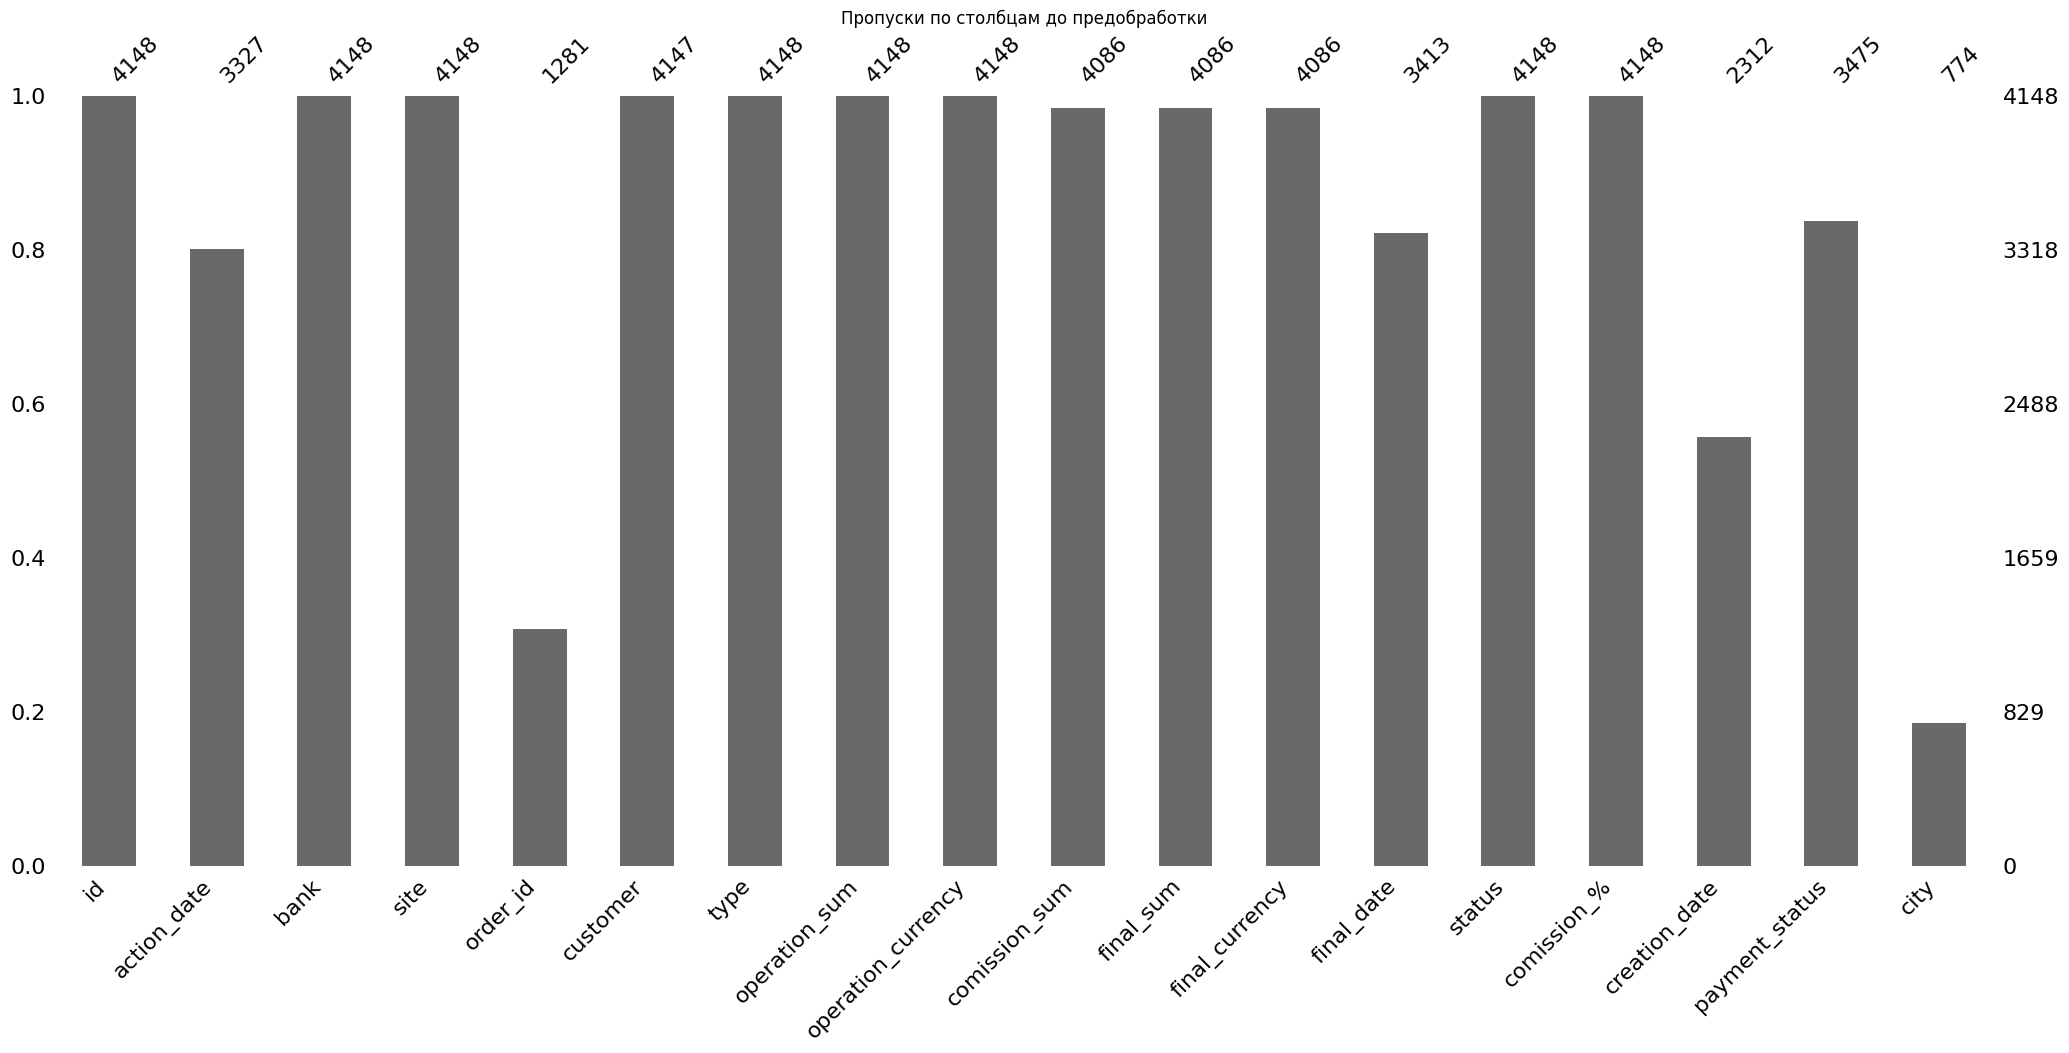

In [21]:
msno.bar(data)
plt.title('Пропуски по столбцам до предобработки')
plt.show()

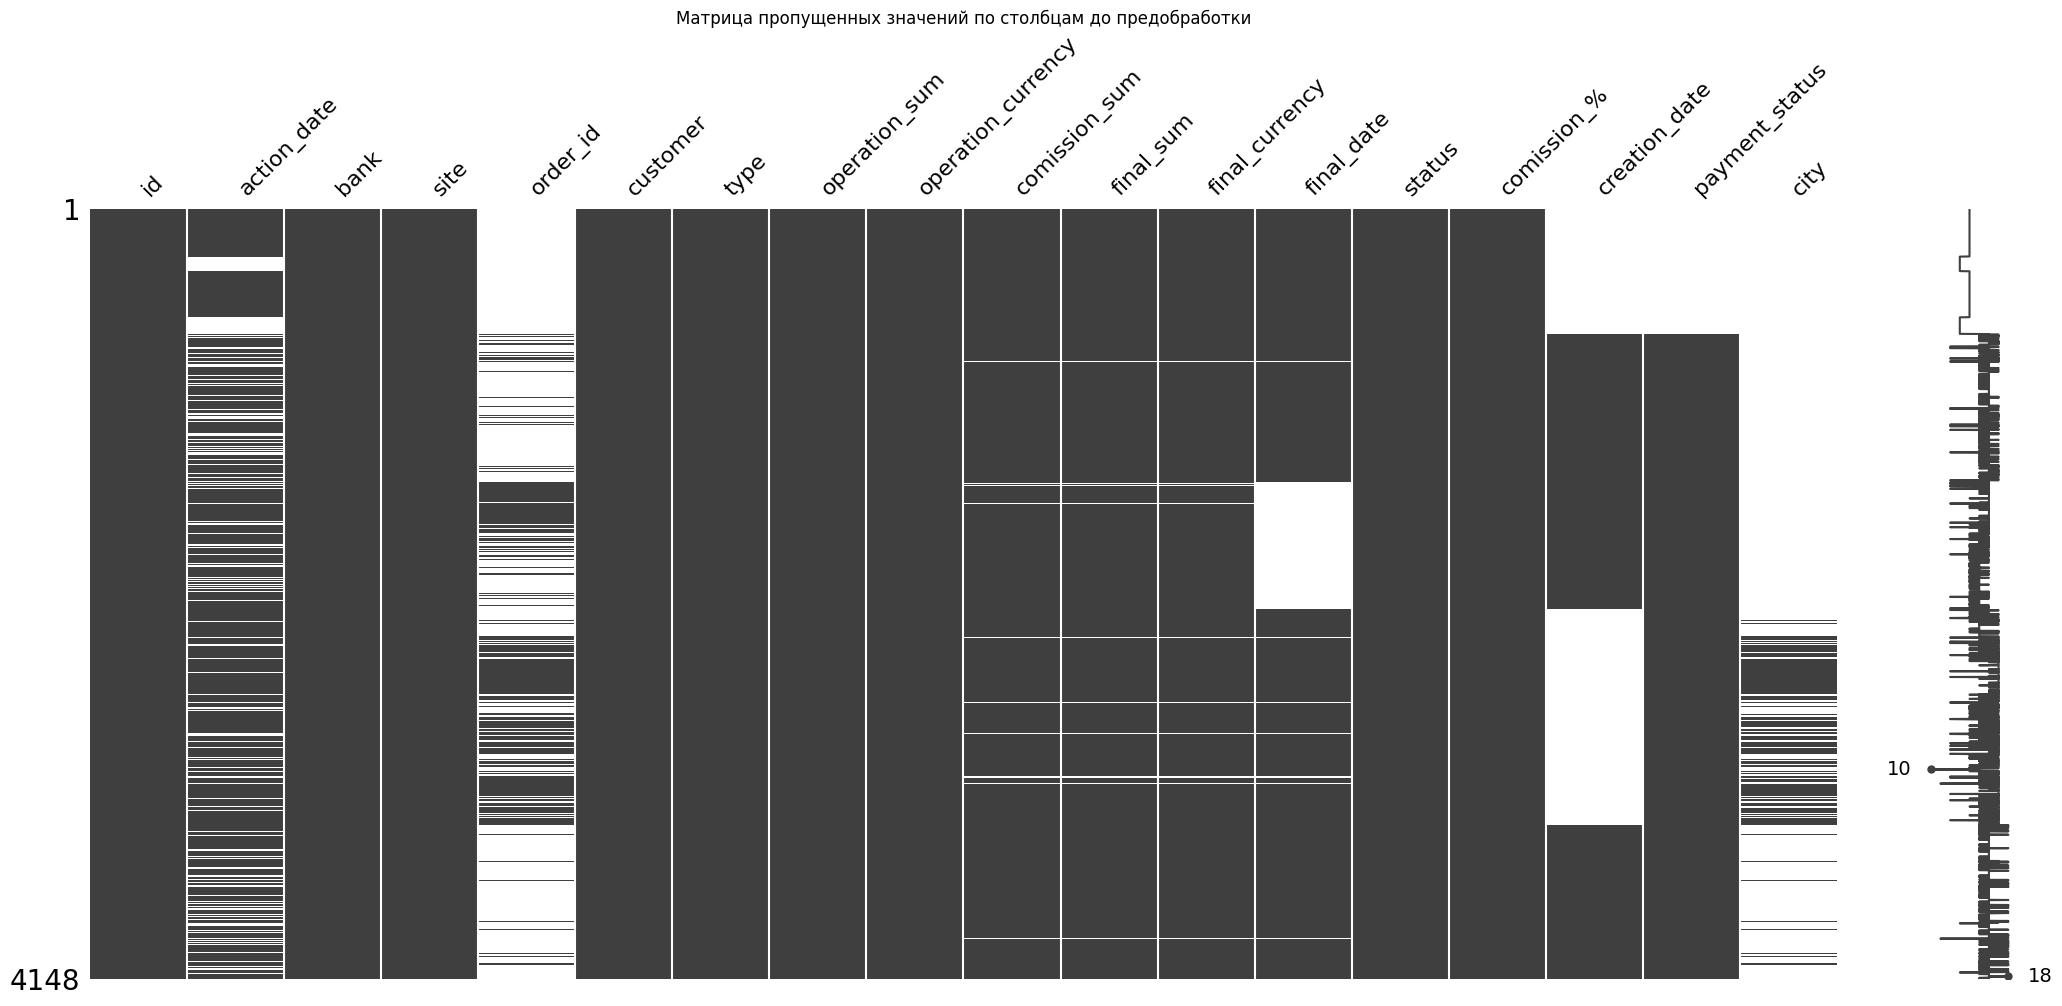

In [22]:
msno.matrix(data)
plt.title('Матрица пропущенных значений по столбцам до предобработки')
plt.show()

У нас нет группы данных в столбцах **final_date и creation_date**, скорее всего это данные полностью по месяцам.

In [23]:
list_gaps = data.isna().sum()[data.isna().sum() > 0].index.to_list()
list_gaps

['action_date',
 'order_id',
 'customer',
 'comission_sum',
 'final_sum',
 'final_currency',
 'final_date',
 'creation_date',
 'payment_status',
 'city']

In [24]:
data[list_gaps].isnull().corr()

action_date  order_id  customer  comission_sum  final_sum  \
action_date        1.000000  0.182753 -0.007714       0.247971   0.247971   
order_id           0.182753  1.000000  0.010380      -0.175683  -0.175683   
customer          -0.007714  0.010380  1.000000      -0.001913  -0.001913   
comission_sum      0.247971 -0.175683 -0.001913       1.000000   1.000000   
final_sum          0.247971 -0.175683 -0.001913       1.000000   1.000000   
final_currency     0.247971 -0.175683 -0.001913       1.000000   1.000000   
final_date         0.051538 -0.217308 -0.007206       0.265443   0.265443   
creation_date     -0.052861 -0.177544 -0.013838       0.014230   0.014230   
payment_status     0.058747  0.294165 -0.006834      -0.054210  -0.054210   
city               0.135422  0.712517  0.007438      -0.104194  -0.104194   

                final_currency  final_date  creation_date  payment_status  \
action_date           0.247971    0.051538      -0.052861        0.058747   
order_id             -0.175683   -0.217308      -0.177544        0.294165   
customer             -0.001913   -0.007206      -0.013838       -0.006834   
comission_sum         1.000000    0.265443       0.014230       -0.054210   
final_sum             1.000000    0.265443       0.014230       -0.054210   
final_currency        1.000000    0.265443       0.014230       -0.054210   
final_date            0.265443    1.000000      -0.374135       -0.204223   
creation_date         0.014230   -0.374135       1.000000        0.493842   
payment_status       -0.054210   -0.204223       0.493842        1.000000   
city                 -0.104194    0.170406      -0.442787        0.210779   

                    city  
action_date     0.135422  
order_id        0.712517  
customer        0.007438  
comission_sum  -0.104194  
final_sum      -0.104194  
final_currency -0.104194  
final_date      0.170406  
creation_date  -0.442787  
payment_status  0.210779  
city            1.000000

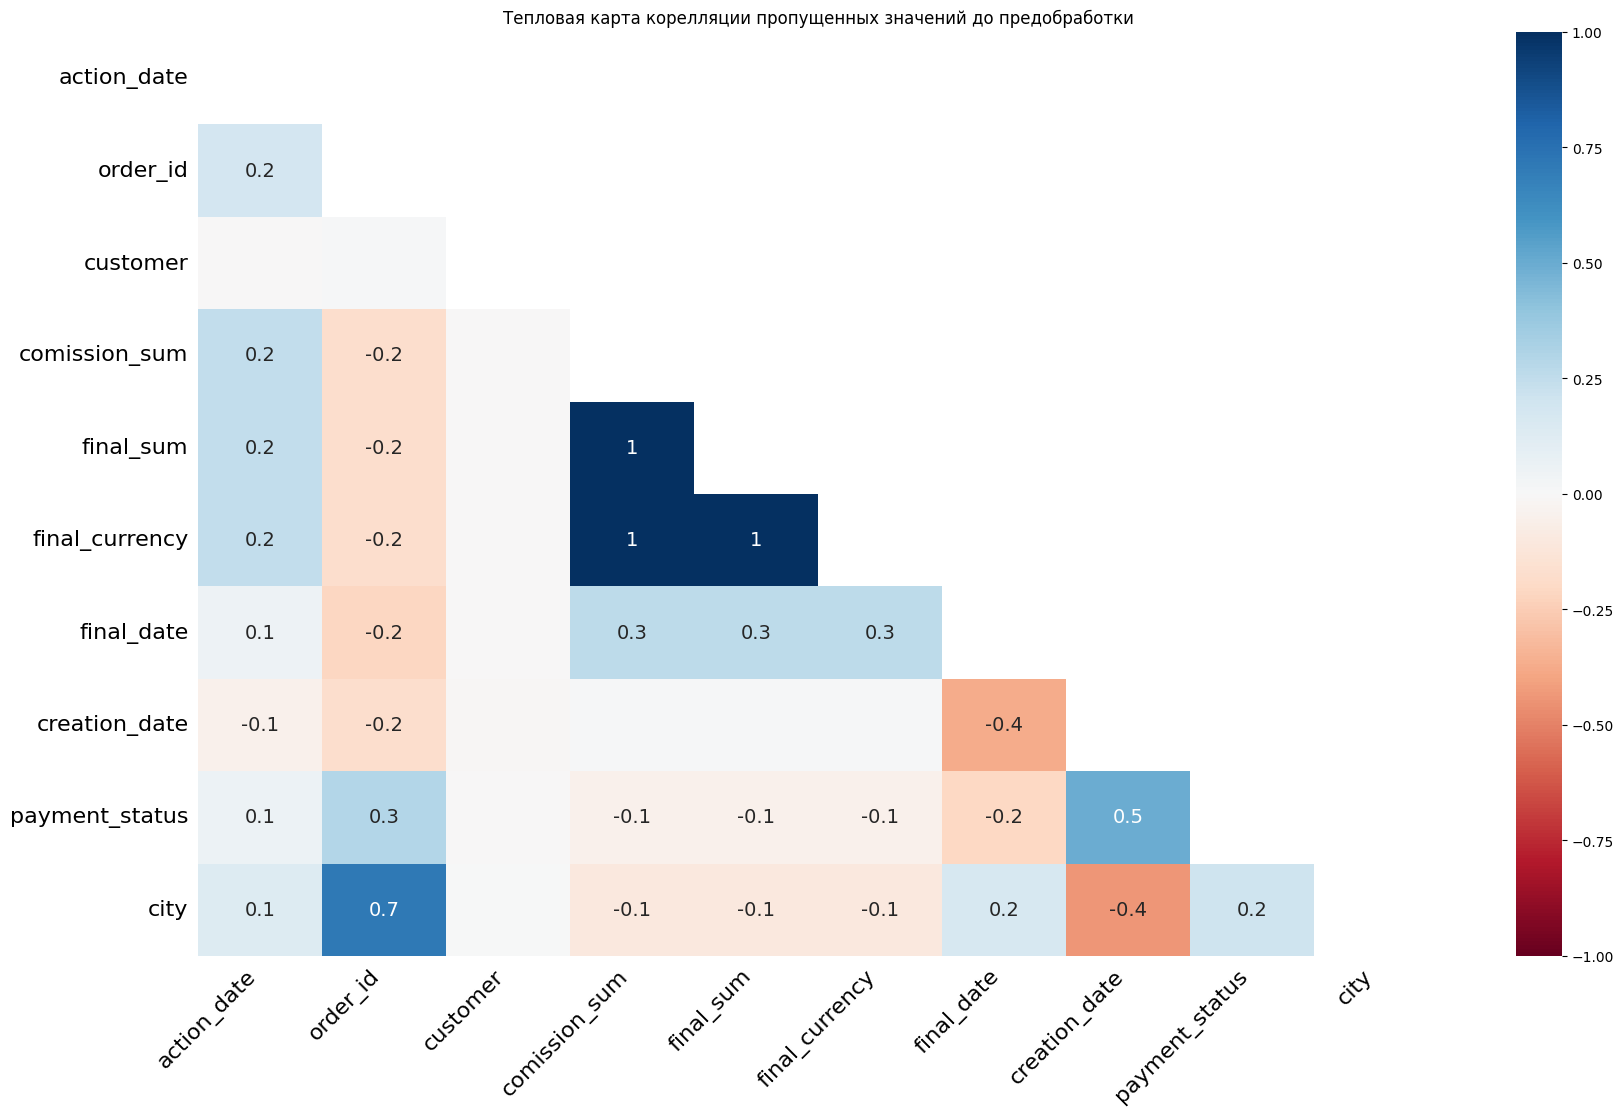

In [25]:
msno.heatmap(data)
plt.title('Тепловая карта корелляции пропущенных значений до предобработки')
plt.show()

В нашем случае пропуски у столбцов **final_sum,	final_currency и comission_sum** полностью связаны между собой. Также есть положительная корреляция пропусков между полями **city и order_id**.

#### Пропуски в датах

По матрице пропущенных значений видно, что пропуски в столбце **final_date** расположены вместе, скорей всего это один период времени. Оценим период и попробуем заполнить пропуски в столбце **action_date**.

In [26]:
data.loc[data['final_date'].isna()]['action_date'].describe()

count                              557
mean     2024-05-21 05:07:23.806104064
min                2024-05-01 09:55:00
25%                2024-05-13 14:15:00
50%                2024-05-25 09:47:00
75%                2024-05-28 10:22:00
max                2024-05-31 21:46:00
Name: action_date, dtype: object

In [27]:
data.loc[data['creation_date'].isna()]['action_date'].describe()

count                             1516
mean     2024-05-01 10:20:35.817942016
min                2024-01-01 09:55:00
25%                2024-02-13 14:50:15
50%                2024-06-09 17:27:00
75%                2024-06-22 10:46:30
max                2024-06-30 22:18:00
Name: action_date, dtype: object

In [28]:
data.loc[data['action_date'].isna()]['creation_date'].describe()

count                              501
mean     2024-05-19 00:27:16.407185664
min                2024-03-01 01:28:00
25%                2024-04-12 20:27:00
50%                2024-05-13 08:56:00
75%                2024-07-11 01:24:00
max                2024-07-31 15:20:00
Name: creation_date, dtype: object

Пропуски в столбце **final_date** только в мае.
Пропуски в **creation_date** в разные периоды.


Посмотрим какая разница во времени между **creation_date и action_date**

In [29]:
data['diff_days'] = (data['action_date'] - data['creation_date'].dt.floor('D')).dt.days
data.head()

id         action_date      bank              site order_id  \
0  2080468405 2024-01-31 20:18:00  Тинькофф  prostieveschi.ru      NaN   
1  2080039460 2024-01-30 22:18:00  Тинькофф  prostieveschi.ru      NaN   
2  2079851261 2024-01-30 14:55:00  Тинькофф  prostieveschi.ru      NaN   
3  2079846986 2024-01-30 14:45:00  Тинькофф  prostieveschi.ru      NaN   
4  2079829457 2024-01-30 14:09:00  Тинькофф  prostieveschi.ru      NaN   

              customer               type  operation_sum operation_currency  \
0    12ost****@mail.ru  Регулярная оплата           1000                RUB   
1  tigro****@gmail.com  Регулярная оплата            200                RUB   
2    nat****@gmail.com  Регулярная оплата            300                RUB   
3  natalk****@inbox.ru  Регулярная оплата            700                RUB   
4     in****@yandex.ru  Регулярная оплата            500                RUB   

   comission_sum  final_sum final_currency final_date     status  comission_%  \
0           32.0      968.0            RUB 2024-02-01  Завершена          3.2   
1            6.4      193.6            RUB 2024-01-31  Завершена          3.2   
2            9.6      290.4            RUB 2024-01-31  Завершена          3.2   
3           22.4      677.6            RUB 2024-01-31  Завершена          3.2   
4           16.0      484.0            RUB 2024-01-31  Завершена          3.2   

  creation_date payment_status city  diff_days  
0           NaT            NaN  NaN        NaN  
1           NaT            NaN  NaN        NaN  
2           NaT            NaN  NaN        NaN  
3           NaT            NaN  NaN        NaN  
4           NaT            NaN  NaN        NaN

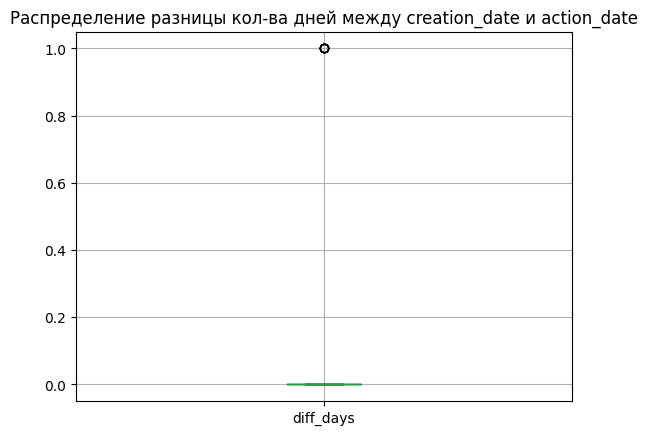

In [30]:
data[['id','diff_days']].boxplot()
plt.title('Распределение разницы кол-ва дней между creation_date и action_date')
plt.show()

In [31]:
data['diff_days'].mean()

0.0027609055770292656

In [32]:
data.loc[data['diff_days']>0]

id         action_date      bank              site order_id  \
1534  2116705095 2024-05-30 00:04:00  Тинькофф  prostieveschi.ru  21321.0   
1657  2116362990 2024-05-28 01:24:00  Тинькофф  prostieveschi.ru  21185.0   
3965  2123124948 2024-07-07 00:04:00  Тинькофф  prostieveschi.ru      NaN   
3981  2122965623 2024-07-06 00:04:00  Тинькофф  prostieveschi.ru      NaN   
4002  2122793309 2024-07-05 00:04:00  Тинькофф  prostieveschi.ru      NaN   

                         customer                         type  operation_sum  \
1534         nchuis****@gmail.com  Оплата с созданием подписки           1000   
1657              Rja****@mail.ru                       Оплата            500   
3965                O****@mail.ru            Регулярная оплата            100   
3981  ivanova.tanya****@gmail.com            Регулярная оплата            300   
4002           Akka****@gmail.com            Регулярная оплата            300   

     operation_currency  comission_sum  final_sum final_currency final_date  \
1534                RUB           32.0      968.0            RUB        NaT   
1657                RUB           16.0      484.0            RUB        NaT   
3965                RUB            3.9       96.1            RUB 2024-07-08   
3981                RUB            9.6      290.4            RUB 2024-07-08   
4002                RUB            9.6      290.4            RUB 2024-07-08   

         status  comission_%       creation_date payment_status city  \
1534  Completed          3.2 2024-05-29 23:59:00       Approved  NaN   
1657  Completed          3.2 2024-05-27 23:10:00       Approved  NaN   
3965  Completed          3.2 2024-07-06 23:59:00       Approved  NaN   
3981  Completed          3.2 2024-07-05 23:59:00       Approved  NaN   
4002  Completed          3.2 2024-07-04 23:59:00       Approved  NaN   

      diff_days  
1534        1.0  
1657        1.0  
3965        1.0  
3981        1.0  
4002        1.0

In [33]:
median_diff_days = data['diff_days'].median()
median_diff_days

0.0

У нас есть случаи, когда разница между creation_date и action_date составила 1 день, но это случаи, когда совершение платежа пришлось в момент перехода дня, **по сути у нас нет разницы в днях в этих столбцах**.

**Учитывая это дозаполним пропуски в action_date значениями из столбца creation_date**

In [34]:
#Перезапишем данные в новый датафрейм
new_df = data.copy(deep=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  4148 non-null   object        
 1   action_date         3327 non-null   datetime64[ns]
 2   bank                4148 non-null   object        
 3   site                4148 non-null   object        
 4   order_id            1281 non-null   object        
 5   customer            4147 non-null   object        
 6   type                4148 non-null   object        
 7   operation_sum       4148 non-null   int64         
 8   operation_currency  4148 non-null   object        
 9   comission_sum       4086 non-null   float64       
 10  final_sum           4086 non-null   float64       
 11  final_currency      4086 non-null   object        
 12  final_date          3413 non-null   datetime64[ns]
 13  status              4148 non-null   object      

In [35]:
#Заполним пропуски в action_date значениями из creation_date
new_df['action_date'] = new_df['action_date'].fillna(data['creation_date'])

In [36]:
#Количество пропусков после заполнения
new_df['action_date'].isna().sum()

320

In [37]:
#Посмотрим по каким месяцам остались пропуски
new_df.loc[new_df['action_date'].isna()].groupby(new_df['final_date'].dt.to_period('M'))['id'].count()

final_date
2024-01     78
2024-02     90
2024-03      1
2024-06    110
2024-07     10
Freq: M, Name: id, dtype: int64

In [38]:
#Посмотрим с каким статусов проходят заявки, где есть пропуски в датах
new_df.query('action_date.isna()').groupby('status', as_index=False)['id'].count()

status   id
0   Declined  151
1  Отклонена  169

In [39]:
#Всего значений в столбце статус
new_df.value_counts('status')

status
Completed    2823
Declined      652
Завершена     504
Отклонена     169
Name: count, dtype: int64

Итого нам удалось заполнить чуть более 500 пропусков. Пропуски остались только в столбцах со статусом оплата отклонена.
Посмотрим разницу в днях со столбцом final_date.

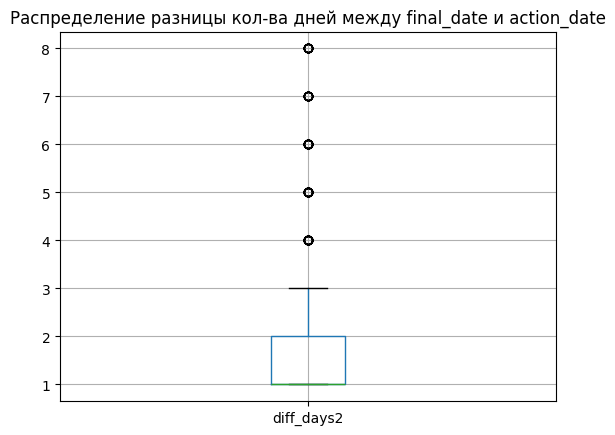

In [40]:
new_df['diff_days2'] = (new_df['final_date'] - new_df['action_date'].dt.floor('D')).dt.days


new_df[['id','diff_days2']].boxplot()
plt.title('Распределение разницы кол-ва дней между final_date и action_date')
plt.show()

In [41]:
new_df['diff_days2'].mean()

1.557618437900128

In [42]:
new_df['diff_days2'].median()

1.0

Здесь разница в среднем 1,5 дня, медианные значения дают 1 день, это значит, что при проведении операции, дата операции в столбце final_date прописывается на 1-2 дня позже.
Этим значением мы можем заполнить пропуски в action_date.

In [43]:
new_df['action_date'] = new_df['action_date'].fillna(new_df['final_date'] - pd.to_timedelta(new_df['diff_days2'].median(), unit='D'))

In [44]:
new_df['action_date'].isna().sum()

31

Итого мы восстановили почти все значения дат.

####Пропуски в order_id

Теперь оценим пропуски в номерах заказах. Посмотрим есть ли связь с другими полями.

In [45]:
#Распределение значений по типам платежей
new_df.value_counts('type')

type
Регулярная оплата              2858
Оплата                          836
Оплата с созданием подписки     454
Name: count, dtype: int64

In [46]:
#Распределение значений по типам платежей, где есть пропуски в столбце order_id
new_df.query('order_id.isna()').groupby('type')['id'].count()

type
Оплата с созданием подписки       9
Регулярная оплата              2858
Name: id, dtype: int64

In [47]:
new_df.query('order_id.isna()').groupby('type')['id'].count() / new_df.value_counts('type')

type
Оплата                              NaN
Оплата с созданием подписки    0.019824
Регулярная оплата              1.000000
dtype: float64

Да, мы можем подтвердить, что у типа оплаты **Регулярная оплата** 100% не заполнено поле order_id.

Также есть 9 пропусков при типе **Оплата с созданием подписки**. Заполнем пропуски маркерным значением.

In [48]:
new_df.query('order_id.isna() and type =="Оплата с созданием подписки"')

id         action_date      bank              site order_id  \
40    2076897932 2024-01-24 11:35:00  Тинькофф  prostieveschi.ru      NaN   
205   2068973025 2024-01-06 21:04:00  Тинькофф  prostieveschi.ru      NaN   
515   2085227563 2024-02-10 17:42:00  Тинькофф  prostieveschi.ru      NaN   
747   2102683701 2024-03-24 07:25:00  Тинькофф  prostieveschi.ru      NaN   
983   2097951277 2024-03-10 12:21:00  Тинькофф  prostieveschi.ru      NaN   
3511  2126142674 2024-07-25 17:26:00  Тинькофф  prostieveschi.ru      NaN   
3528  2126012257 2024-07-24 21:52:00  Тинькофф  prostieveschi.ru      NaN   
3936  2123501207 2024-07-09 09:17:00  Тинькофф  prostieveschi.ru      NaN   
4079  2122422659 2024-07-02 20:42:00  Тинькофф  prostieveschi.ru      NaN   

                       customer                         type  operation_sum  \
40           k1rr****@gmail.com  Оплата с созданием подписки            500   
205   reasontosta****@gmail.com  Оплата с созданием подписки            300   
515      kgpozdny****@gmail.com  Оплата с созданием подписки           2000   
747     ksebondar****@gmail.com  Оплата с созданием подписки            500   
983   blackberryk****@gmail.com  Оплата с созданием подписки            100   
3511     grushina****@yandex.ru  Оплата с созданием подписки            200   
3528    nellyakov****@yandex.ru  Оплата с созданием подписки            500   
3936  irina.sasch****@yandex.ru  Оплата с созданием подписки           1000   
4079     ira-ira-gu****@list.ru  Оплата с созданием подписки            300   

     operation_currency  comission_sum  final_sum final_currency final_date  \
40                  RUB           16.0      484.0            RUB 2024-01-25   
205                 RUB            9.6      290.4            RUB 2024-01-09   
515                 RUB           64.0     1936.0            RUB 2024-02-12   
747                 RUB           16.0      484.0            RUB 2024-03-25   
983                 RUB            3.9       96.1            RUB 2024-03-11   
3511                RUB            6.4      193.6            RUB 2024-07-26   
3528                RUB           16.0      484.0            RUB 2024-07-25   
3936                RUB           32.0      968.0            RUB 2024-07-10   
4079                RUB            9.6      290.4            RUB 2024-07-03   

         status  comission_%       creation_date payment_status  \
40    Завершена          3.2                 NaT            NaN   
205   Завершена          3.2                 NaT            NaN   
515   Завершена          3.2                 NaT            NaN   
747   Completed          3.2 2024-03-24 07:24:00       Approved   
983   Completed          3.2 2024-03-10 12:21:00       Approved   
3511  Completed          3.2 2024-07-25 17:26:00       Approved   
3528  Completed          3.2 2024-07-24 21:51:00       Approved   
3936  Completed          3.2 2024-07-09 09:16:00       Approved   
4079  Completed          3.2 2024-07-02 20:42:00       Approved   

                 city  diff_days  diff_days2  
40                NaN        NaN         1.0  
205               NaN        NaN         3.0  
515               NaN        NaN         2.0  
747               NaN        0.0         1.0  
983               NaN        0.0         1.0  
3511           Москва        0.0         1.0  
3528  Санкт-Петербург        0.0         1.0  
3936              NaN        0.0         1.0  
4079              NaN        0.0         1.0

In [49]:
new_df['order_id'].describe()

count        1281.0
unique       1223.0
top       3058309.0
freq            5.0
Name: order_id, dtype: float64

In [50]:
new_df['order_id'] = new_df['order_id'].fillna(999999999)

<ipython-input-50-09b56ae15eb3>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['order_id'] = new_df['order_id'].fillna(999999999)


In [51]:
new_df['order_id'].isna().sum()

0

####Пропуски в comission_sum, final_sum и final_curerncy

Пропуски в этих столбцах в одних и тех же строках. Посмотрим есть ли зависимость пропуска от значений другого столбца.

In [52]:
new_df.query('comission_sum.isna()').value_counts('status')

status
Declined    62
Name: count, dtype: int64

In [53]:
new_df.value_counts('status')

status
Completed    2823
Declined      652
Завершена     504
Отклонена     169
Name: count, dtype: int64

In [54]:
new_df.query('comission_sum.isna()').head()

id         action_date      bank              site     order_id  \
741  2102818252 2024-03-24 16:40:00  Тинькофф  prostieveschi.ru   31510123.0   
748  2102643971 2024-03-24 01:04:00  Тинькофф  prostieveschi.ru      20049.0   
749  2102643784 2024-03-24 01:03:00  Тинькофф  prostieveschi.ru      20048.0   
804  2101167552 2024-03-19 17:09:00  Тинькофф  prostieveschi.ru  515408499.0   
821  2100792929 2024-03-18 14:07:00  Тинькофф  prostieveschi.ru      19972.0   

                  customer    type  operation_sum operation_currency  \
741           ****@mail.ru  Оплата            200                RUB   
748     liox****@gmail.com  Оплата             10                EUR   
749     liox****@gmail.com  Оплата             10                EUR   
804   mnaula****@gmail.com  Оплата           3000                RUB   
821  kliriko****@gmail.com  Оплата            300                RUB   

     comission_sum  final_sum final_currency final_date    status  \
741            NaN        NaN            NaN        NaT  Declined   
748            NaN        NaN            NaN        NaT  Declined   
749            NaN        NaN            NaN        NaT  Declined   
804            NaN        NaN            NaN        NaT  Declined   
821            NaN        NaN            NaN        NaT  Declined   

     comission_%       creation_date                   payment_status city  \
741          0.0 2024-03-24 16:40:00  CheckResponseServiceUnavailable  NaN   
748          0.0 2024-03-24 01:04:00                             5113  NaN   
749          0.0 2024-03-24 01:03:00                             5113  NaN   
804          0.0 2024-03-19 17:09:00  CheckResponseServiceUnavailable  NaN   
821          0.0 2024-03-18 14:07:00                             5113  NaN   

     diff_days  diff_days2  
741        NaN         NaN  
748        NaN         NaN  
749        NaN         NaN  
804        NaN         NaN  
821        NaN         NaN

In [55]:
#Посмотрим по каким месяцам пропуски
new_df.loc[new_df['comission_sum'].isna()].groupby(new_df['action_date'].dt.to_period('M'))['id'].count()

action_date
2024-03     6
2024-04     6
2024-05    15
2024-07     4
Freq: M, Name: id, dtype: int64

In [56]:
#Посмотрим по каким валютам пропуски
new_df.query('comission_sum.isna()').value_counts('operation_currency')

operation_currency
RUB    36
EUR    15
USD     7
BYN     4
Name: count, dtype: int64

In [57]:
new_df.value_counts('operation_currency')

operation_currency
RUB    4122
EUR      15
USD       7
BYN       4
Name: count, dtype: int64

In [58]:
new_df.value_counts('final_currency')

final_currency
RUB    4086
Name: count, dtype: int64

In [59]:
#Посмотрим по статусам платежей пропуски
new_df.query('comission_sum.isna()').value_counts('payment_status')

payment_status
5113                               26
AuthenticationFailed               12
UnableToProcess                    10
CheckResponseFormatError            8
CheckResponseServiceUnavailable     6
Name: count, dtype: int64

Возможно пропуски/ отмены платежей могли случится в том числе из-за валюты платежей пропуски в столбцах **comission_sum, final_sum и final_curerncy** 100% связаны с валютой платежа, ни один платеж в другой валюте не прошел. Также есть не прошедшие платежи в рублях.

Оценим суммы по этим столбцам. Сохраним в отдельный датафрейм и исключим эти данные из текущего датафрейма.

In [60]:
#Сохраним эти данный в отдельный датафрейм
payments_in_cur = new_df.query('comission_sum.isna()')[['id', 'action_date', 'bank', 'site', 'status', 'order_id', 'customer',
                                                   'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum',
                                                   'final_currency', 'comission_%', 'city', 'payment_status', 'creation_date']]
payments_in_cur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 741 to 4111
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  62 non-null     object        
 1   action_date         31 non-null     datetime64[ns]
 2   bank                62 non-null     object        
 3   site                62 non-null     object        
 4   status              62 non-null     object        
 5   order_id            62 non-null     float64       
 6   customer            62 non-null     object        
 7   type                62 non-null     object        
 8   operation_sum       62 non-null     int64         
 9   operation_currency  62 non-null     object        
 10  comission_sum       0 non-null      float64       
 11  final_sum           0 non-null      float64       
 12  final_currency      0 non-null      object        
 13  comission_%         62 non-null     float64       
 1

In [61]:
#Посмотрим сразу здесь дубликаты сумм
payments_in_cur[payments_in_cur.duplicated(subset=['customer', 'creation_date', 'operation_sum'], keep=False)]

id action_date      bank              site    status   order_id  \
2330  2121371613         NaT  Тинькофф  prostieveschi.ru  Declined  2470947.0   
2331  2121371446         NaT  Тинькофф  prostieveschi.ru  Declined  2470947.0   
2657  2120299673         NaT  Тинькофф  prostieveschi.ru  Declined    22147.0   
2658  2120299541         NaT  Тинькофф  prostieveschi.ru  Declined    22147.0   
2746  2119581714         NaT  Тинькофф  prostieveschi.ru  Declined    22048.0   
2747  2119581650         NaT  Тинькофф  prostieveschi.ru  Declined    22048.0   
2825  2119261603         NaT  Тинькофф  prostieveschi.ru  Declined  3058309.0   
2826  2119261590         NaT  Тинькофф  prostieveschi.ru  Declined  3058309.0   
2827  2119261542         NaT  Тинькофф  prostieveschi.ru  Declined  3058309.0   
3183  2117601693         NaT  Тинькофф  prostieveschi.ru  Declined    21550.0   
3184  2117601534         NaT  Тинькофф  prostieveschi.ru  Declined    21550.0   

                      customer    type  operation_sum operation_currency  \
2330      elen.b****@gmail.com  Оплата            500                RUB   
2331      elen.b****@gmail.com  Оплата            500                RUB   
2657  sod.guseva****@gmail.com  Оплата            500                RUB   
2658  sod.guseva****@gmail.com  Оплата            500                RUB   
2746     marsano****@gmail.com  Оплата             10                BYN   
2747     marsano****@gmail.com  Оплата             10                BYN   
2825           fro****@mail.ru  Оплата             55                RUB   
2826           fro****@mail.ru  Оплата             55                RUB   
2827           fro****@mail.ru  Оплата             55                RUB   
3183        dmitry@pravdin.org  Оплата             10                EUR   
3184        dmitry@pravdin.org  Оплата             10                EUR   

      comission_sum  final_sum final_currency  comission_%             city  \
2330            NaN        NaN            NaN          0.0  Санкт-Петербург   
2331            NaN        NaN            NaN          0.0  Санкт-Петербург   
2657            NaN        NaN            NaN          3.2           Москва   
2658            NaN        NaN            NaN          3.2           Москва   
2746            NaN        NaN            NaN          0.0           Москва   
2747            NaN        NaN            NaN          3.9           Москва   
2825            NaN        NaN            NaN          0.0             Вена   
2826            NaN        NaN            NaN          0.0             Вена   
2827            NaN        NaN            NaN          0.0             Вена   
3183            NaN        NaN            NaN          0.0          Никосия   
3184            NaN        NaN            NaN          0.0          Никосия   

                payment_status creation_date  
2330  CheckResponseFormatError           NaT  
2331  CheckResponseFormatError           NaT  
2657           UnableToProcess           NaT  
2658           UnableToProcess           NaT  
2746                      5113           NaT  
2747           UnableToProcess           NaT  
2825  CheckResponseFormatError           NaT  
2826  CheckResponseFormatError           NaT  
2827  CheckResponseFormatError           NaT  
3183                      5113           NaT  
3184                      5113           NaT

In [62]:
payments_in_cur = payments_in_cur.drop_duplicates(subset=['customer', 'creation_date', 'operation_sum']).reset_index(drop=True)

payments_in_cur[payments_in_cur.duplicated(subset=['customer', 'creation_date', 'operation_sum'], keep=False)]

Empty DataFrame
Columns: [id, action_date, bank, site, status, order_id, customer, type, operation_sum, operation_currency, comission_sum, final_sum, final_currency, comission_%, city, payment_status, creation_date]
Index: []

In [63]:
payments_in_cur.query('comission_sum.isna()').groupby('operation_currency')['operation_sum'].agg(['count', 'sum', 'mean'])

count    sum         mean
operation_currency                           
BYN                     3    110    36.666667
EUR                    14    184    13.142857
RUB                    32  47455  1482.968750
USD                     7    343    49.000000

Эти платежи были примерно на сумму 100 000 рублей за наблюдаемый период.

Добавим столбцы с месяцем, датой без времени, и статусом в общем виде и сохраним в файл.

In [64]:
payments_in_cur['month'] =  payments_in_cur['action_date'].dt.to_period('M').astype(str)
payments_in_cur['action_date2'] = pd.to_datetime(new_df['action_date']).dt.date

In [65]:
#Функция, приводящая значения в столбце status к единому виду
def status(col):
  if col == 'Completed' or col == 'Завершена':
    return 'завершена'
  elif col== 'Declined' or col == 'Отклонена':
    return 'отклонена'
  else:
    return 'NaN'

In [66]:
payments_in_cur['status2'] = payments_in_cur['status'].apply(status)

In [67]:
payments_in_cur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  56 non-null     object        
 1   action_date         31 non-null     datetime64[ns]
 2   bank                56 non-null     object        
 3   site                56 non-null     object        
 4   status              56 non-null     object        
 5   order_id            56 non-null     float64       
 6   customer            56 non-null     object        
 7   type                56 non-null     object        
 8   operation_sum       56 non-null     int64         
 9   operation_currency  56 non-null     object        
 10  comission_sum       0 non-null      float64       
 11  final_sum           0 non-null      float64       
 12  final_currency      0 non-null      object        
 13  comission_%         56 non-null     float64       
 

In [68]:
payments_in_cur = payments_in_cur[['id', 'action_date2', 'month', 'bank', 'site', 'order_id', 'customer',
                                                   'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum',
                                                   'final_currency', 'status2', 'comission_%', 'city', 'payment_status']]

In [69]:
#сохраняем в файл
payments_in_cur.to_excel('payments_in_cur.xlsx', index=False)

In [70]:
# Зафиксируем количество строк до удаления
shape = new_df.shape[0]
shape

4148

In [71]:
new_df.dropna(subset='comission_sum', inplace=True, ignore_index=True)

In [72]:
print(f'Удалено строк: {round((1 -new_df.shape[0] / shape) *100, 2)}%')
print()
display(new_df.isna().sum())

Удалено строк: 1.49%



id                       0
action_date              0
bank                     0
site                     0
order_id                 0
customer                 1
type                     0
operation_sum            0
operation_currency       0
comission_sum            0
final_sum                0
final_currency           0
final_date             673
status                   0
comission_%              0
creation_date         1805
payment_status         673
city                  3344
diff_days             2275
diff_days2             962
dtype: int64

In [73]:
new_df.groupby('operation_currency')['operation_sum'].count()

operation_currency
RUB    4086
Name: operation_sum, dtype: int64

####Пропуски в столбце customer

In [74]:
new_df.query('customer.isna()')

id         action_date      bank              site     order_id  \
1000  2096037273 2024-03-05 13:58:00  Тинькофф  prostieveschi.ru  999999999.0   

     customer               type  operation_sum operation_currency  \
1000      NaN  Регулярная оплата            100                RUB   

      comission_sum  final_sum final_currency final_date     status  \
1000            3.9       96.1            RUB 2024-03-06  Completed   

      comission_%       creation_date payment_status city  diff_days  \
1000          3.2 2024-03-05 13:58:00       Approved  NaN        0.0   

      diff_days2  
1000         1.0

Так как для анализа и дальнейших рекламных действий нам необходим ID клиента, эту строку мы удалим.

In [75]:
new_df.shape[0]

4086

In [76]:
new_df = new_df.dropna(subset='customer').reset_index(drop=True)

In [77]:
new_df.shape[0]

4085

####Пропуски в столбце city

In [78]:
new_df.query('city.isna()').value_counts('type')

type
Регулярная оплата              2854
Оплата                          319
Оплата с созданием подписки     170
Name: count, dtype: int64

In [79]:
new_df.query('city.isna()').value_counts('status')

status
Completed    2114
Declined      556
Завершена     504
Отклонена     169
Name: count, dtype: int64

In [80]:
new_df.loc[new_df['city'].isna()].groupby(new_df['action_date'].dt.to_period('M'))['id'].count()

action_date
2024-01    335
2024-02    338
2024-03    394
2024-04    388
2024-05    673
2024-06    463
2024-07    752
Freq: M, Name: id, dtype: int64

По столбцу город не видно зависимости незаполнения платежа ни от столбца статус, ни от типа, ни от даты. В этом столбце пропуски мы оставим.

#### Пропуски в столбце **payment_status**

Добавим сотлбец с месяцем посмотрим по каким месяцам пропуски

In [81]:
new_df['payment_status'].isna().sum()

673

In [82]:
new_df['month'] = new_df['action_date'].dt.to_period('M').astype(str)

In [83]:
new_df.head()

id         action_date      bank              site     order_id  \
0  2080468405 2024-01-31 20:18:00  Тинькофф  prostieveschi.ru  999999999.0   
1  2080039460 2024-01-30 22:18:00  Тинькофф  prostieveschi.ru  999999999.0   
2  2079851261 2024-01-30 14:55:00  Тинькофф  prostieveschi.ru  999999999.0   
3  2079846986 2024-01-30 14:45:00  Тинькофф  prostieveschi.ru  999999999.0   
4  2079829457 2024-01-30 14:09:00  Тинькофф  prostieveschi.ru  999999999.0   

              customer               type  operation_sum operation_currency  \
0    12ost****@mail.ru  Регулярная оплата           1000                RUB   
1  tigro****@gmail.com  Регулярная оплата            200                RUB   
2    nat****@gmail.com  Регулярная оплата            300                RUB   
3  natalk****@inbox.ru  Регулярная оплата            700                RUB   
4     in****@yandex.ru  Регулярная оплата            500                RUB   

   comission_sum  ...  final_currency final_date     status comission_%  \
0           32.0  ...             RUB 2024-02-01  Завершена         3.2   
1            6.4  ...             RUB 2024-01-31  Завершена         3.2   
2            9.6  ...             RUB 2024-01-31  Завершена         3.2   
3           22.4  ...             RUB 2024-01-31  Завершена         3.2   
4           16.0  ...             RUB 2024-01-31  Завершена         3.2   

   creation_date payment_status city diff_days  diff_days2    month  
0            NaT            NaN  NaN       NaN         1.0  2024-01  
1            NaT            NaN  NaN       NaN         1.0  2024-01  
2            NaT            NaN  NaN       NaN         1.0  2024-01  
3            NaT            NaN  NaN       NaN         1.0  2024-01  
4            NaT            NaN  NaN       NaN         1.0  2024-01  

[5 rows x 21 columns]

In [84]:
new_df.columns

Index(['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type',
       'operation_sum', 'operation_currency', 'comission_sum', 'final_sum',
       'final_currency', 'final_date', 'status', 'comission_%',
       'creation_date', 'payment_status', 'city', 'diff_days', 'diff_days2',
       'month'],
      dtype='object')

In [85]:
#Посмотрим по каким месяцам пропуски

new_df.loc[new_df['payment_status'].isna()].value_counts('month').sort_index()

month
2024-01    335
2024-02    338
Name: count, dtype: int64

In [86]:
#Для сравнения выведем количество транзакций по каждому месяцу
new_df.value_counts('month').sort_index()

month
2024-01     335
2024-02     338
2024-03     394
2024-04     388
2024-05     673
2024-06    1132
2024-07     825
Name: count, dtype: int64

Пропуски по статусу платежа у нас 100% в январе и феврале. Их мы удалять не будем

Итоговый результат после обработки пропусков:

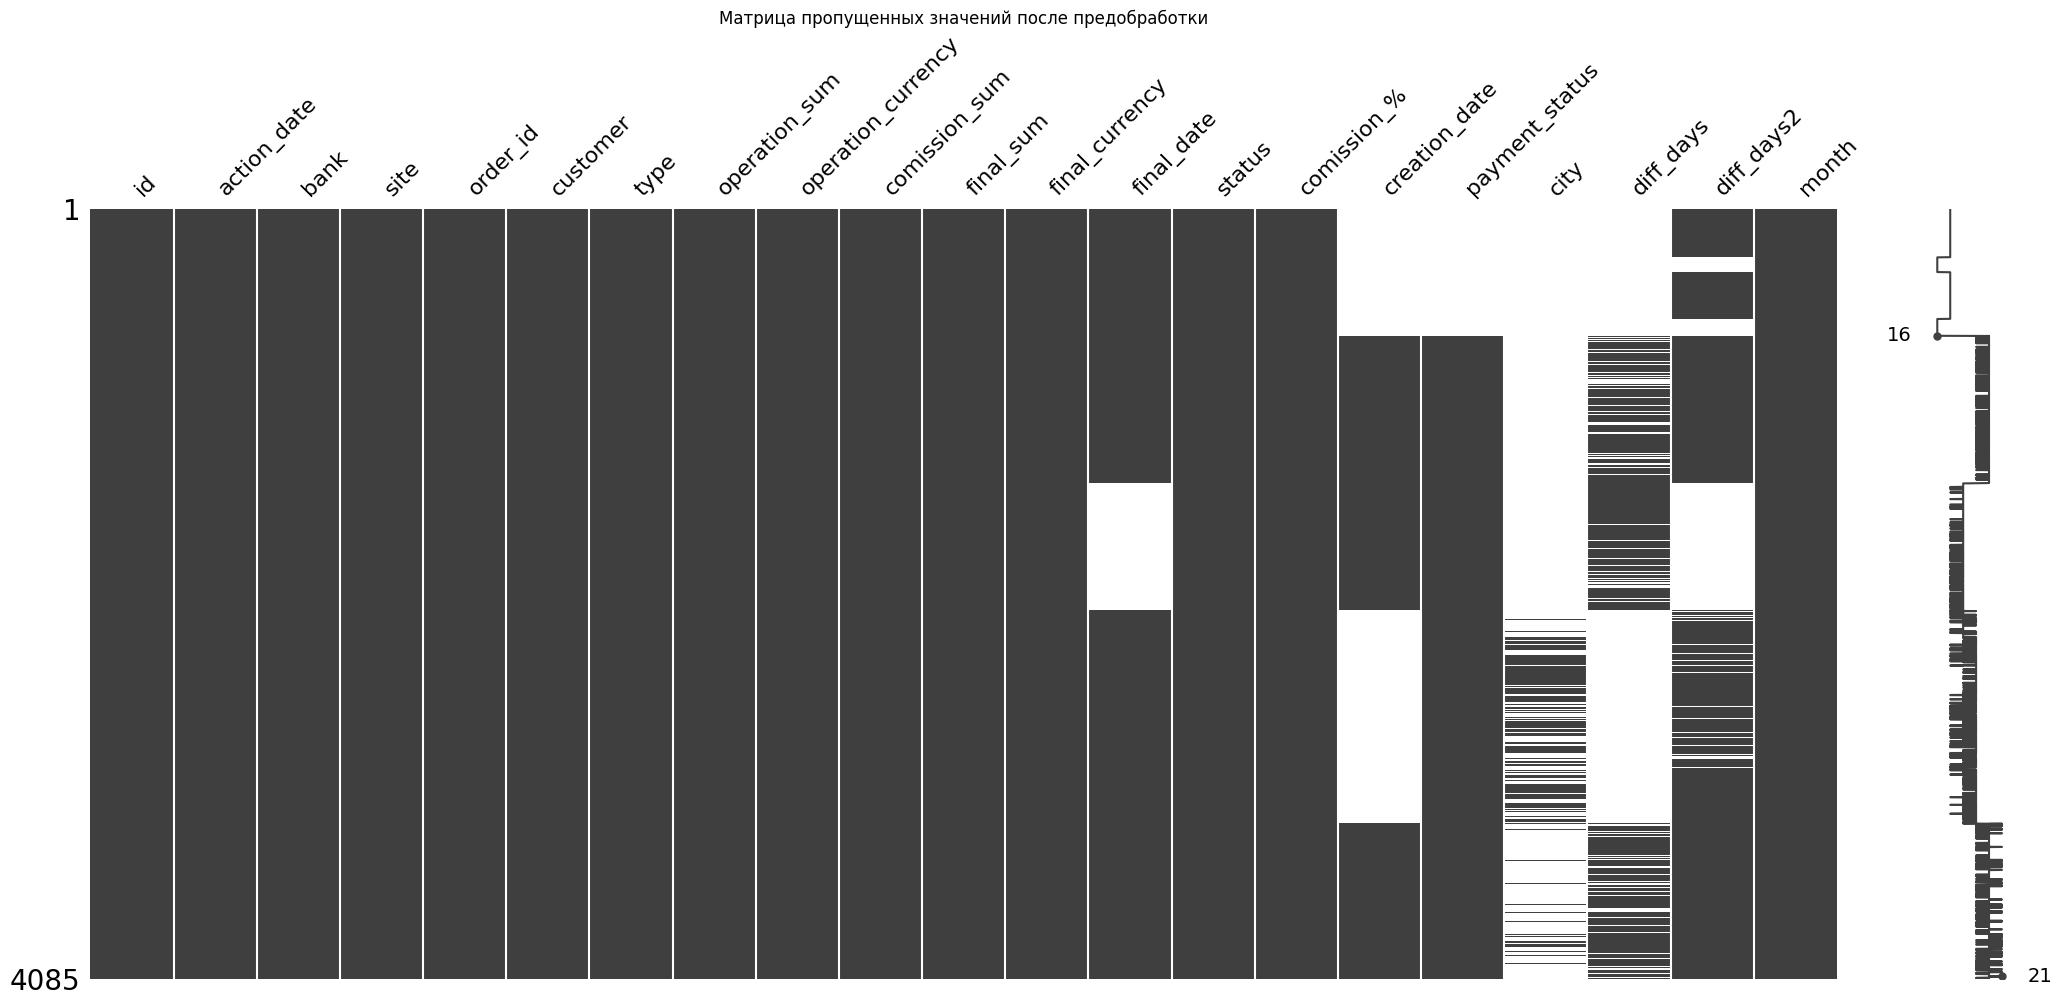

In [87]:
msno.matrix(new_df)
plt.title('Матрица пропущенных значений после предобработки')
plt.show()

###Корректировка данных в столбцах

Переведем значения в столбце **статус (status)** в один вид.

In [88]:
#Текущее распределение значений в столбце
new_df.value_counts('status')

status
Completed    2822
Declined      590
Завершена     504
Отклонена     169
Name: count, dtype: int64

In [89]:
#Функция, приводящая значения в столбце status к единому виду
def status(col):
  if col == 'Completed' or col == 'Завершена':
    return 'завершена'
  elif col== 'Declined' or col == 'Отклонена':
    return 'отклонена'
  else:
    return 'NaN'

In [90]:
new_df['status2'] = new_df['status'].apply(status)

In [91]:
new_df.value_counts('status2')

status2
завершена    3326
отклонена     759
Name: count, dtype: int64

Посмотрим другие столбцы

In [92]:
list_check = ['comission_%', 'final_currency', 'operation_currency', 'type', 'site', 'bank', 'city']

for col in list_check:
  print(f'{new_df.value_counts(col)}')
  print()

comission_%
3.2    4085
Name: count, dtype: int64

final_currency
RUB    4085
Name: count, dtype: int64

operation_currency
RUB    4085
Name: count, dtype: int64

type
Регулярная оплата              2855
Оплата                          776
Оплата с созданием подписки     454
Name: count, dtype: int64

site
prostieveschi.ru    4085
Name: count, dtype: int64

bank
Тинькофф    4085
Name: count, dtype: int64

city
Москва             241
Санкт-Петербург    179
Екатеринбург        14
Краснодар           11
Тбилиси              8
                  ... 
Йошкар-Ола           1
Йехуд                1
Иври-сюр-Сен         1
Зеленоград           1
Марибор              1
Name: count, Length: 158, dtype: int64



Здесь изменять значения не нужно.

Посмотрим значения по городам.

In [93]:
sorted(new_df.loc[~new_df['city'].isna()]['city'].unique())

['Ada',
 'Galliate',
 'Kwai Chung',
 'North Bergen',
 'Petah Tikva',
 'Sint Philipsland',
 'Алматы',
 'Альтусрид',
 'Амстердам',
 'Анкара',
 'Апатиты',
 'Архангельск',
 'Афины',
 'Балашиха',
 'Барнаул',
 'Барселона',
 'Бейоглу',
 'Белгород',
 'Белград',
 'Бердск',
 'Берлин',
 'Бирмингем',
 'Бишкек',
 'Бодрум',
 'Будва',
 'Буэнос-Айрес',
 'Варшава',
 'Великий Новгород',
 'Вена',
 'Вила-Реал',
 'Вильнюс',
 'Владивосток',
 'Владимир',
 'Вологда',
 'Воронеж',
 'Геленджик',
 'Горно-Алтайск',
 'Гравлин',
 'Гунценхаузен',
 'Дзержинск',
 'Дмитров',
 'Дорнбирн',
 'Дубай',
 'Екатеринбург',
 'Ереван',
 'Жамберк',
 'Жуковский',
 'Зеленоград',
 'Иваново',
 'Иври-сюр-Сен',
 'Иерусалим',
 'Ижевск',
 'Йехуд',
 'Йошкар-Ола',
 'Казань',
 'Калуга',
 'Кинешма',
 'Киров',
 'Кирово-Чепецк',
 'Кисловодск',
 'Коломна',
 'Колпино',
 'Кондопога',
 'Котор',
 'Краснодар',
 'Кубинка',
 'Курск',
 'Кёльн',
 'Лас-Пальмас-де-Гран-Канария',
 'Лейпциг',
 'Липецк',
 'Лиссабон',
 'Лонг-Бич',
 'Лондон',
 'Лос-Анджелес',
 '

In [94]:
unique_cities = new_df.loc[~new_df['city'].isna(), 'city']
found = False

"""
    Код выичисляет расстояния Левенштейна и выводит
    совпадения на 99% и более
"""

for city, city1 in enumerate(unique_cities.unique()):
    if (unique_cities.nunique()-1) != city:
      for city2 in unique_cities.unique()[(city+1):]:
        if fuzz.ratio(city1, city2) >= 99:

          print(city1)
          print(city2)
          print(50*'-')
          found = True

if not found:
  print('Совпадений не найдено.')

Совпадений не найдено.


###Проверка на наличие дубликатов

In [95]:
#Оценим явные дубликаты
new_df.duplicated().sum()

0

In [96]:
new_df[new_df.duplicated(subset=['id'], keep=False)]

Empty DataFrame
Columns: [id, action_date, bank, site, order_id, customer, type, operation_sum, operation_currency, comission_sum, final_sum, final_currency, final_date, status, comission_%, creation_date, payment_status, city, diff_days, diff_days2, month, status2]
Index: []

[0 rows x 22 columns]

Посмотрим на повторяющиеся зачения в связке день - клиент. Для этого добавим столбец action_date без времени.

In [97]:
new_df['action_date2'] = pd.to_datetime(new_df['action_date']).dt.date

In [98]:
new_df[new_df.duplicated(subset=['customer', 'action_date2'], keep=False)].sort_values(by='customer').head()

id         action_date      bank              site     order_id  \
1541  2116632146 2024-05-29 15:18:00  Тинькофф  prostieveschi.ru      21287.0   
1527  2116681200 2024-05-29 20:21:00  Тинькофф  prostieveschi.ru      21308.0   
305   2071751869 2024-01-14 00:00:00  Тинькофф  prostieveschi.ru  999999999.0   
2901  2118924442 2024-06-12 00:00:00  Тинькофф  prostieveschi.ru  999999999.0   
2946  2118749230 2024-06-12 00:00:00  Тинькофф  prostieveschi.ru  999999999.0   

                     customer                         type  operation_sum  \
1541             ****@mail.ru  Оплата с созданием подписки            100   
1527             ****@mail.ru                       Оплата           1000   
305   925470602****@gmail.com            Регулярная оплата            100   
2901  925470602****@gmail.com            Регулярная оплата            100   
2946  925470602****@gmail.com            Регулярная оплата            100   

     operation_currency  comission_sum  ...     status comission_%  \
1541                RUB            3.9  ...  Completed         3.2   
1527                RUB           32.0  ...  Completed         3.2   
305                 RUB            0.5  ...  Отклонена         3.2   
2901                RUB            0.5  ...   Declined         3.2   
2946                RUB            0.5  ...   Declined         3.2   

           creation_date             payment_status  city diff_days  \
1541 2024-05-29 15:17:00                   Approved   NaN       0.0   
1527 2024-05-29 20:21:00                   Approved   NaN       0.0   
305                  NaT                        NaN   NaN       NaN   
2901                 NaT  ExceedWithdrawalFrequency   NaN       NaN   
2946                 NaT  ExceedWithdrawalFrequency   NaN       NaN   

     diff_days2    month    status2  action_date2  
1541        NaN  2024-05  завершена    2024-05-29  
1527        NaN  2024-05  завершена    2024-05-29  
305         NaN  2024-01  отклонена    2024-01-14  
2901        NaN  2024-06  отклонена    2024-06-12  
2946        NaN  2024-06  отклонена    2024-06-12  

[5 rows x 23 columns]

In [99]:
#Функция, проверяющая наличие дубликатов в выбранных столбцах, и считающая количество этих дубликатов по выбранному полю
def payments_dupl(list_col, col):
  res = new_df[new_df.duplicated(subset=list_col, keep=False)].sort_values(by='customer').value_counts(col)
  return res

In [100]:
list_col=['customer', 'action_date2', 'operation_sum']

payments_dupl(list_col, 'type')

type
Регулярная оплата              107
Оплата                          56
Оплата с созданием подписки     19
Name: count, dtype: int64

In [101]:
payments_dupl(list_col, 'status2')

status2
отклонена    137
завершена     45
Name: count, dtype: int64

In [102]:
#Платежи клиентов (успешные и нет) задублировавшиеся по соответствующему статусу.
list_col=['customer', 'action_date2', 'operation_sum', 'status2']
payments_dupl(list_col, 'status2')

status2
отклонена    103
завершена      7
Name: count, dtype: int64

Чаще всего дублируются **отклоненные регулярные оплаты**. Но и завершенные оплаты есть.

In [103]:
#Посмотрим на список клиентов, где в один и тот же день было совершено несколько платежей на одну и ту же сумму, если значения в колонке count > 1, то это успешные двойные платежи,
#если = 1, мы можем предположить, что после отмены, оплата прошла успешно
list_compl_paym = new_df[new_df.duplicated(subset=['customer', 'action_date2', 'operation_sum'], keep=False)].query('status2 =="завершена"').value_counts('customer')
list_compl_paym

customer
nextl****@mail.ru               4
humblehelptope****@gmail.com    3
And****@yandex.ru               1
mjacov****@gmail.com            1
katya.gerashch****@gmail.com    1
konstanti****@gmail.com         1
kpl****@yandex.ru               1
ksebondar****@gmail.com         1
l_****@mail.ru                  1
lenalenova****@gmail.com        1
mudr****@gmail.com              1
k1rr****@gmail.com              1
nellyakov****@yandex.ru         1
o.rudit****@iqconsultancy.ru    1
oon****@yandex.ru               1
piatka****@gmail.com            1
prosto-****@mail.ru             1
tasne****@rambler.ru            1
thrum_sloth0i@icloud.com        1
katja1985mt@yandex.ru           1
k.nevaleno****@gmail.com        1
Decor.bronni****@gmail.com      1
daria.****@gmail.com            1
Janne.A****@gmail.com           1
Kloushantse****@mail.ru         1
Schapok****@gmail.com           1
agova@list.ru                   1
ale****@yandex.ru               1
alina.zlobins****@gmail.com     1
aminamag@yandex.ru              1
daxas****@yandex.ru             1
ira-ira-gu****@list.ru          1
denisch****@mail.ru             1
dmali****@gmail.com             1
domo****@gmail.com              1
efimka****@mail.ru              1
gavri****@gmail.com             1
grushina****@yandex.ru          1
immo****@yandex.ru              1
usol****@gmail.com              1
Name: count, dtype: int64

In [104]:
#Сохраним список клиентов в отдельный датафрейм
email_dupl = list_compl_paym.index.to_list()
email_dupl

['nextl****@mail.ru',
 'humblehelptope****@gmail.com',
 'And****@yandex.ru',
 'mjacov****@gmail.com',
 'katya.gerashch****@gmail.com',
 'konstanti****@gmail.com',
 'kpl****@yandex.ru',
 'ksebondar****@gmail.com',
 'l_****@mail.ru',
 'lenalenova****@gmail.com',
 'mudr****@gmail.com',
 'k1rr****@gmail.com',
 'nellyakov****@yandex.ru',
 'o.rudit****@iqconsultancy.ru',
 'oon****@yandex.ru',
 'piatka****@gmail.com',
 'prosto-****@mail.ru',
 'tasne****@rambler.ru',
 'thrum_sloth0i@icloud.com',
 'katja1985mt@yandex.ru',
 'k.nevaleno****@gmail.com',
 'Decor.bronni****@gmail.com',
 'daria.****@gmail.com',
 'Janne.A****@gmail.com',
 'Kloushantse****@mail.ru',
 'Schapok****@gmail.com',
 'agova@list.ru',
 'ale****@yandex.ru',
 'alina.zlobins****@gmail.com',
 'aminamag@yandex.ru',
 'daxas****@yandex.ru',
 'ira-ira-gu****@list.ru',
 'denisch****@mail.ru',
 'dmali****@gmail.com',
 'domo****@gmail.com',
 'efimka****@mail.ru',
 'gavri****@gmail.com',
 'grushina****@yandex.ru',
 'immo****@yandex.ru',
 '

In [105]:
#Выведем клиентов у которых возможно задублировались успешные платежи
new_df.query('customer ==["nextl****@mail.ru", "humblehelptope****@gmail.com"]')

id         action_date      bank              site     order_id  \
795   2101232539 2024-03-19 20:53:00  Тинькофф  prostieveschi.ru      19994.0   
796   2101230263 2024-03-19 20:45:00  Тинькофф  prostieveschi.ru      19994.0   
797   2101229295 2024-03-19 20:42:00  Тинькофф  prostieveschi.ru      19993.0   
804   2101066181 2024-03-19 11:20:00  Тинькофф  prostieveschi.ru      19985.0   
1185  2108961119 2024-04-19 20:42:00  Тинькофф  prostieveschi.ru  999999999.0   
1635  2116363291 2024-05-27 23:14:00  Тинькофф  prostieveschi.ru      21186.0   
2218  2121561487 2024-06-27 23:15:00  Тинькофф  prostieveschi.ru  999999999.0   
2708  2119570888 2024-06-15 21:22:00  Тинькофф  prostieveschi.ru      22045.0   
2727  2119479167 2024-06-15 11:05:00  Тинькофф  prostieveschi.ru      22019.0   
3364  2126526739 2024-07-27 23:15:00  Тинькофф  prostieveschi.ru  999999999.0   
3646  2124529284 2024-07-15 21:22:00  Тинькофф  prostieveschi.ru  999999999.0   
3663  2124437887 2024-07-15 11:06:00  Тинькофф  prostieveschi.ru  999999999.0   

                          customer                         type  \
795   humblehelptope****@gmail.com                       Оплата   
796   humblehelptope****@gmail.com                       Оплата   
797   humblehelptope****@gmail.com  Оплата с созданием подписки   
804   humblehelptope****@gmail.com                       Оплата   
1185  humblehelptope****@gmail.com            Регулярная оплата   
1635             nextl****@mail.ru  Оплата с созданием подписки   
2218             nextl****@mail.ru            Регулярная оплата   
2708             nextl****@mail.ru  Оплата с созданием подписки   
2727             nextl****@mail.ru  Оплата с созданием подписки   
3364             nextl****@mail.ru            Регулярная оплата   
3646             nextl****@mail.ru            Регулярная оплата   
3663             nextl****@mail.ru            Регулярная оплата   

      operation_sum operation_currency  comission_sum  ...     status  \
795           50000                RUB         1600.0  ...  Completed   
796           50000                RUB            0.5  ...   Declined   
797           50000                RUB         1600.0  ...  Completed   
804           50000                RUB         1600.0  ...  Completed   
1185          50000                RUB            0.5  ...   Declined   
1635            100                RUB            3.9  ...  Completed   
2218            100                RUB            3.9  ...  Completed   
2708            100                RUB            3.9  ...  Completed   
2727            100                RUB            3.9  ...  Completed   
3364            100                RUB            3.9  ...  Completed   
3646            100                RUB            3.9  ...  Completed   
3663            100                RUB            3.9  ...  Completed   

     comission_%       creation_date             payment_status    city  \
795          3.2 2024-03-19 20:53:00                   Approved     NaN   
796          3.2 2024-03-19 20:45:00  ExceedWithdrawalFrequency     NaN   
797          3.2 2024-03-19 20:42:00                   Approved     NaN   
804          3.2 2024-03-19 11:20:00                   Approved     NaN   
1185         3.2 2024-04-19 20:42:00      SuspectedFraudDecline     NaN   
1635         3.2 2024-05-27 23:14:00                   Approved     NaN   
2218         3.2                 NaT                   Approved     NaN   
2708         3.2                 NaT                   Approved  Москва   
2727         3.2                 NaT                   Approved  Москва   
3364         3.2 2024-07-27 23:15:00                   Approved     NaN   
3646         3.2 2024-07-15 21:22:00                   Approved     NaN   
3663         3.2 2024-07-15 11:06:00                   Approved     NaN   

     diff_days diff_days2    month    status2  action_date2  
795        0.0        1.0  2024-03  завершена    2024-03-19  
796        NaN        1.0  2024-03  от

Так как оплаты успешные, их исключать мы не будем, тем более время оплат разное. В первом случае возможно клиент проводил отдельными переводами несколько платежей, во втором случае клиент судя по всему оформил три ежемесячные подписки.

Посмотрим, что по отменненным платежам.

In [106]:
new_df[new_df.duplicated(subset=['customer', 'action_date2', 'operation_sum'], keep=False)].query('status2 =="отклонена"').value_counts('customer')

customer
ett****@yandex.ru           6
pollygotl****@gmail.com     4
hafiz****@yandex.ru         4
lial****@list.ru            4
marga****@inbox.ru          4
                           ..
l_****@mail.ru              1
lenalenova****@gmail.com    1
denisch****@mail.ru         1
daxas****@yandex.ru         1
immo****@yandex.ru          1
Name: count, Length: 71, dtype: int64

In [107]:
new_df.query('customer =="ett****@yandex.ru"').head(10)

id         action_date      bank              site     order_id  \
330   2067914701 2024-01-08 00:00:00  Тинькофф  prostieveschi.ru  999999999.0   
332   2067494163 2024-01-08 00:00:00  Тинькофф  prostieveschi.ru  999999999.0   
333   2067091792 2024-01-08 00:00:00  Тинькофф  prostieveschi.ru  999999999.0   
665   2082212227 2024-02-04 00:00:00  Тинькофф  prostieveschi.ru  999999999.0   
666   2081751926 2024-02-04 00:00:00  Тинькофф  prostieveschi.ru  999999999.0   
669   2081267628 2024-02-04 00:00:00  Тинькофф  prostieveschi.ru  999999999.0   
1043  2094912531 2024-03-02 12:53:00  Тинькофф  prostieveschi.ru  999999999.0   
1435  2105289289 2024-04-02 12:53:00  Тинькофф  prostieveschi.ru  999999999.0   
2073  2111905697 2024-05-04 12:54:00  Тинькофф  prostieveschi.ru  999999999.0   
2096  2111698563 2024-05-03 12:53:00  Тинькофф  prostieveschi.ru  999999999.0   

               customer               type  operation_sum operation_currency  \
330   ett****@yandex.ru  Регулярная оплата            500                RUB   
332   ett****@yandex.ru  Регулярная оплата            500                RUB   
333   ett****@yandex.ru  Регулярная оплата            500                RUB   
665   ett****@yandex.ru  Регулярная оплата            500                RUB   
666   ett****@yandex.ru  Регулярная оплата            500                RUB   
669   ett****@yandex.ru  Регулярная оплата            500                RUB   
1043  ett****@yandex.ru  Регулярная оплата            500                RUB   
1435  ett****@yandex.ru  Регулярная оплата            500                RUB   
2073  ett****@yandex.ru  Регулярная оплата            500                RUB   
2096  ett****@yandex.ru  Регулярная оплата            500                RUB   

      comission_sum  ...     status comission_%       creation_date  \
330             0.5  ...  Отклонена         3.2                 NaT   
332             0.5  ...  Отклонена         3.2                 NaT   
333             0.5  ...  Отклонена         3.2                 NaT   
665             0.5  ...  Отклонена         3.2                 NaT   
666             0.5  ...  Отклонена         3.2                 NaT   
669             0.5  ...  Отклонена         3.2                 NaT   
1043           16.0  ...  Completed         3.2 2024-03-02 12:53:00   
1435           16.0  ...  Completed         3.2 2024-04-02 12:53:00   
2073            0.5  ...   Declined         3.2 2024-05-04 12:54:00   
2096            0.5  ...   Declined         3.2 2024-05-03 12:53:00   

         payment_status  city diff_days diff_days2    month    status2  \
330                 NaN   NaN       NaN        NaN  2024-01  отклонена   
332                 NaN   NaN       NaN        NaN  2024-01  отклонена   
333                 NaN   NaN       NaN        NaN  2024-01  отклонена   
665                 NaN   NaN       NaN        NaN  2024-02  отклонена   
666                 NaN   NaN       NaN        NaN  2024-02  отклонена   
669                 NaN   NaN       NaN        NaN  2024-02  отклонена   
1043           Approved   NaN       0.0        2.0  2024-03  завершена   
1435           Approved   NaN       0.0        1.0  2024-04  завершена   
2073  InsufficientFunds   NaN       NaN        NaN  2024-05  отклонена   
2096  InsufficientFunds   NaN       NaN        NaN  2024-05  отклонена   

      action_date2  
330     2024-01-08  
332     2024-01-08  
333     2024-01-08  
665     2024-02-04  
666     2024-02-04  
669     2024-02-04  
1043    2024-03-02  
1435    2024-04-02  
2073    2024-05-04  
2096    2024-05-03  

[10 rows x 23 columns]

В данном случае дубликатов отмененных платежей больше, так как попытки списаний проходят три раза в течение 3х дней. Здесь нужно исключать дубликаты в связке месяц-клиент-сумма. Это мы сделаем в отдельном датафрейме.

Но у нас также есть платежи, по которым в один и тот же день прошла отмена и успешный платеж. Посмотрим на эти дубликаты по ранее сохраненным email с успешными платежами и в последствии исключим id этих отклоненных транзакций из списка отмененных платежей.

In [108]:
#Список клиентов с задублировавшимися переводами с обоими статусами в один и тот же день
new_df[new_df.duplicated(subset=['customer', 'action_date2', 'operation_sum'], keep=False)].loc[new_df['customer'].isin(email_dupl)].groupby(['action_date2', 'status2', 'customer'])['id'].count().head(6)

action_date2  status2    customer               
2024-01-24    завершена  k1rr****@gmail.com         1
              отклонена  k1rr****@gmail.com         1
2024-02-11    завершена  Kloushantse****@mail.ru    1
                         domo****@gmail.com         1
              отклонена  Kloushantse****@mail.ru    1
                         domo****@gmail.com         1
Name: id, dtype: int64

In [109]:
#Список транзакций с отмененными платежами при наличии успешных платежей в тот же день
for_declined = new_df[new_df.duplicated(subset=['customer',
                                                'action_date2',
                                                'operation_sum'], keep=False)].loc[(new_df['customer'].isin(email_dupl)) & (new_df['status2']=='отклонена')].sort_values(by='action_date')

display(for_declined.head())
print()
print('Количество транзакций для исключения из declined: ',for_declined.shape[0])

id action_date      bank              site     order_id  \
264  2076874516  2024-01-24  Тинькофф  prostieveschi.ru  999999999.0   
658  2085266717  2024-02-11  Тинькофф  prostieveschi.ru  999999999.0   
660  2085014587  2024-02-11  Тинькофф  prostieveschi.ru  999999999.0   
617  2088803879  2024-02-18  Тинькофф  prostieveschi.ru  999999999.0   
622  2088338739  2024-02-18  Тинькофф  prostieveschi.ru  999999999.0   

                     customer               type  operation_sum  \
264        k1rr****@gmail.com  Регулярная оплата            500   
658   Kloushantse****@mail.ru  Регулярная оплата            500   
660        domo****@gmail.com  Регулярная оплата            200   
617  k.nevaleno****@gmail.com  Регулярная оплата            100   
622  k.nevaleno****@gmail.com  Регулярная оплата            100   

    operation_currency  comission_sum  ...     status comission_%  \
264                RUB            0.5  ...  Отклонена         3.2   
658                RUB            0.5  ...  Отклонена         3.2   
660                RUB            0.5  ...  Отклонена         3.2   
617                RUB            0.5  ...  Отклонена         3.2   
622                RUB            0.5  ...  Отклонена         3.2   

    creation_date payment_status  city diff_days diff_days2    month  \
264           NaT            NaN   NaN       NaN        NaN  2024-01   
658           NaT            NaN   NaN       NaN        NaN  2024-02   
660           NaT            NaN   NaN       NaN        NaN  2024-02   
617           NaT            NaN   NaN       NaN        NaN  2024-02   
622           NaT            NaN   NaN       NaN        NaN  2024-02   

       status2  action_date2  
264  отклонена    2024-01-24  
658  отклонена    2024-02-11  
660  отклонена    2024-02-11  
617  отклонена    2024-02-18  
622  отклонена    2024-02-18  

[5 rows x 23 columns]


Количество транзакций для исключения из declined:  44


Разделим платежи на два датафрейма: завершенные операции и отклоненные, чтобы отдельно их проанализировать.

###Добавление новых столбцов, разделение датафреймов

In [110]:
declined = new_df[new_df['status2'] == 'отклонена'][['id', 'action_date', 'action_date2', 'month', 'bank', 'site', 'order_id', 'customer',
                                                   'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum',
                                                   'final_currency', 'status2', 'comission_%', 'city', 'payment_status']]

In [111]:
def check_info(df):
  display(df.head())
  print()
  print(df.info())
  print()
  display(df.value_counts('status2'))


In [112]:
check_info(declined)

id action_date action_date2    month      bank              site  \
256  2080076756  2024-01-31   2024-01-31  2024-01  Тинькофф  prostieveschi.ru   
257  2079609225  2024-01-30   2024-01-30  2024-01  Тинькофф  prostieveschi.ru   
258  2079397292  2024-01-29   2024-01-29  2024-01  Тинькофф  prostieveschi.ru   
259  2079100030  2024-01-28   2024-01-28  2024-01  Тинькофф  prostieveschi.ru   
260  2078923096  2024-01-28   2024-01-28  2024-01  Тинькофф  prostieveschi.ru   

        order_id                      customer               type  \
256  999999999.0   feoktistovaan****@gmail.com  Регулярная оплата   
257  999999999.0   feoktistovaan****@gmail.com  Регулярная оплата   
258  999999999.0           polinch****@list.ru  Регулярная оплата   
259  999999999.0  valeriyavarvar****@gmail.com  Регулярная оплата   
260  999999999.0           polinch****@list.ru  Регулярная оплата   

     operation_sum operation_currency  comission_sum  final_sum  \
256            500                RUB            0.5       -0.5   
257            500                RUB            0.5       -0.5   
258            150                RUB            0.5       -0.5   
259            500                RUB            0.5       -0.5   
260            150                RUB            0.5       -0.5   

    final_currency    status2  comission_% city payment_status  
256            RUB  отклонена          3.2  NaN            NaN  
257            RUB  отклонена          3.2  NaN            NaN  
258            RUB  отклонена          3.2  NaN            NaN  
259            RUB  отклонена          3.2  NaN            NaN  
260            RUB  отклонена          3.2  NaN            NaN


<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 256 to 4084
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  759 non-null    object        
 1   action_date         759 non-null    datetime64[ns]
 2   action_date2        759 non-null    object        
 3   month               759 non-null    object        
 4   bank                759 non-null    object        
 5   site                759 non-null    object        
 6   order_id            759 non-null    float64       
 7   customer            759 non-null    object        
 8   type                759 non-null    object        
 9   operation_sum       759 non-null    int64         
 10  operation_currency  759 non-null    object        
 11  comission_sum       759 non-null    float64       
 12  final_sum           759 non-null    float64       
 13  final_currency      759 non-null    object        


status2
отклонена    759
Name: count, dtype: int64

In [113]:
#Сумма комиссии выплаченной за отмененные платежи за весь период
declined['final_sum'].sum()

-379.5

In [114]:
#Исключим задублировавшиеся транзакции с обоими статусами
declined = declined[~declined['id'].isin(for_declined['id'])]
check_info(declined)

id action_date action_date2    month      bank              site  \
256  2080076756  2024-01-31   2024-01-31  2024-01  Тинькофф  prostieveschi.ru   
257  2079609225  2024-01-30   2024-01-30  2024-01  Тинькофф  prostieveschi.ru   
258  2079397292  2024-01-29   2024-01-29  2024-01  Тинькофф  prostieveschi.ru   
259  2079100030  2024-01-28   2024-01-28  2024-01  Тинькофф  prostieveschi.ru   
260  2078923096  2024-01-28   2024-01-28  2024-01  Тинькофф  prostieveschi.ru   

        order_id                      customer               type  \
256  999999999.0   feoktistovaan****@gmail.com  Регулярная оплата   
257  999999999.0   feoktistovaan****@gmail.com  Регулярная оплата   
258  999999999.0           polinch****@list.ru  Регулярная оплата   
259  999999999.0  valeriyavarvar****@gmail.com  Регулярная оплата   
260  999999999.0           polinch****@list.ru  Регулярная оплата   

     operation_sum operation_currency  comission_sum  final_sum  \
256            500                RUB            0.5       -0.5   
257            500                RUB            0.5       -0.5   
258            150                RUB            0.5       -0.5   
259            500                RUB            0.5       -0.5   
260            150                RUB            0.5       -0.5   

    final_currency    status2  comission_% city payment_status  
256            RUB  отклонена          3.2  NaN            NaN  
257            RUB  отклонена          3.2  NaN            NaN  
258            RUB  отклонена          3.2  NaN            NaN  
259            RUB  отклонена          3.2  NaN            NaN  
260            RUB  отклонена          3.2  NaN            NaN


<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 256 to 4084
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  715 non-null    object        
 1   action_date         715 non-null    datetime64[ns]
 2   action_date2        715 non-null    object        
 3   month               715 non-null    object        
 4   bank                715 non-null    object        
 5   site                715 non-null    object        
 6   order_id            715 non-null    float64       
 7   customer            715 non-null    object        
 8   type                715 non-null    object        
 9   operation_sum       715 non-null    int64         
 10  operation_currency  715 non-null    object        
 11  comission_sum       715 non-null    float64       
 12  final_sum           715 non-null    float64       
 13  final_currency      715 non-null    object        


status2
отклонена    715
Name: count, dtype: int64

Исключили 44 транзакции

In [115]:
declined[declined.duplicated(subset=['customer', 'month', 'final_sum'], keep=False)].sort_values(by='customer').head(8)

id         action_date action_date2    month      bank  \
3650  2124505450 2024-07-15 18:35:00   2024-07-15  2024-07  Тинькофф   
3721  2124199904 2024-07-13 18:33:00   2024-07-13  2024-07  Тинькофф   
3692  2124348208 2024-07-14 18:34:00   2024-07-14  2024-07  Тинькофф   
1040  2095004012 2024-03-02 17:07:00   2024-03-02  2024-03  Тинькофф   
1027  2095374525 2024-03-03 17:07:00   2024-03-03  2024-03  Тинькофф   
1317  2107325780 2024-04-12 01:24:00   2024-04-12  2024-04  Тинькофф   
930   2098534459 2024-03-12 01:24:00   2024-03-12  2024-03  Тинькофф   
305   2071751869 2024-01-14 00:00:00   2024-01-14  2024-01  Тинькофф   

                  site     order_id                 customer  \
3650  prostieveschi.ru  999999999.0               ****@bk.ru   
3721  prostieveschi.ru  999999999.0               ****@bk.ru   
3692  prostieveschi.ru  999999999.0               ****@bk.ru   
1040  prostieveschi.ru  999999999.0           ****@yandex.ru   
1027  prostieveschi.ru  999999999.0           ****@yandex.ru   
1317  prostieveschi.ru  999999999.0  925470602****@gmail.com   
930   prostieveschi.ru  999999999.0  925470602****@gmail.com   
305   prostieveschi.ru  999999999.0  925470602****@gmail.com   

                   type  operation_sum operation_currency  comission_sum  \
3650  Регулярная оплата           1000                RUB            0.5   
3721  Регулярная оплата           1000                RUB            0.5   
3692  Регулярная оплата           1000                RUB            0.5   
1040  Регулярная оплата            500                RUB            0.5   
1027  Регулярная оплата            500                RUB            0.5   
1317  Регулярная оплата            100                RUB            0.5   
930   Регулярная оплата            100                RUB            0.5   
305   Регулярная оплата            100                RUB            0.5   

      final_sum final_currency    status2  comission_% city  \
3650       -0.5            RUB  отклонена          3.2  NaN   
3721       -0.5            RUB  отклонена          3.2  NaN   
3692       -0.5            RUB  отклонена          3.2  NaN   
1040       -0.5            RUB  отклонена          3.2  NaN   
1027       -0.5            RUB  отклонена          3.2  NaN   
1317       -0.5            RUB  отклонена          3.2  NaN   
930        -0.5            RUB  отклонена          3.2  NaN   
305        -0.5            RUB  отклонена          3.2  NaN   

                 payment_status  
3650          InsufficientFunds  
3721          InsufficientFunds  
3692          InsufficientFunds  
1040          InsufficientFunds  
1027          InsufficientFunds  
1317  ExceedWithdrawalFrequency  
930   ExceedWithdrawalFrequency  
305                         NaN

In [116]:
#Удалим дубликаты повторных попыток списаний
declined = declined.drop_duplicates(subset=['customer', 'month', 'final_sum']).reset_index(drop=True)

In [117]:
declined[declined.duplicated(subset=['customer', 'month', 'operation_sum'], keep=False)].sort_values(by='customer').head()

Empty DataFrame
Columns: [id, action_date, action_date2, month, bank, site, order_id, customer, type, operation_sum, operation_currency, comission_sum, final_sum, final_currency, status2, comission_%, city, payment_status]
Index: []

In [118]:
check_info(declined)

id action_date action_date2    month      bank              site  \
0  2080076756  2024-01-31   2024-01-31  2024-01  Тинькофф  prostieveschi.ru   
1  2079397292  2024-01-29   2024-01-29  2024-01  Тинькофф  prostieveschi.ru   
2  2079100030  2024-01-28   2024-01-28  2024-01  Тинькофф  prostieveschi.ru   
3  2075878370  2024-01-22   2024-01-22  2024-01  Тинькофф  prostieveschi.ru   
4  2075782873  2024-01-21   2024-01-21  2024-01  Тинькофф  prostieveschi.ru   

      order_id                      customer               type  \
0  999999999.0   feoktistovaan****@gmail.com  Регулярная оплата   
1  999999999.0           polinch****@list.ru  Регулярная оплата   
2  999999999.0  valeriyavarvar****@gmail.com  Регулярная оплата   
3  999999999.0     varankina.f****@gmail.com  Регулярная оплата   
4  999999999.0             let****@yahoo.com  Регулярная оплата   

   operation_sum operation_currency  comission_sum  final_sum final_currency  \
0            500                RUB            0.5       -0.5            RUB   
1            150                RUB            0.5       -0.5            RUB   
2            500                RUB            0.5       -0.5            RUB   
3            500                RUB            0.5       -0.5            RUB   
4            300                RUB            0.5       -0.5            RUB   

     status2  comission_% city payment_status  
0  отклонена          3.2  NaN            NaN  
1  отклонена          3.2  NaN            NaN  
2  отклонена          3.2  NaN            NaN  
3  отклонена          3.2  NaN            NaN  
4  отклонена          3.2  NaN            NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  322 non-null    object        
 1   action_date         322 non-null    datetime64[ns]
 2   action_date2        322 non-null    object        
 3   month               322 non-null    object        
 4   bank                322 non-null    object        
 5   site                322 non-null    object        
 6   order_id            322 non-null    float64       
 7   customer            322 non-null    object        
 8   type                322 non-null    object        
 9   operation_sum       322 non-null    int64         
 10  operation_currency  322 non-null    object        
 11  comission_sum       322 non-null    float64       
 12  final_sum           322 non-null    float64       
 13  final_currency      322 non-null    object       

status2
отклонена    322
Name: count, dtype: int64

Итого у нас осталось 322 транзакции отмененных платежей.

In [119]:
#Сохраним файл excel
declined.to_excel('prostieveschi_declined.xlsx', index=False)

In [120]:
completed = new_df[new_df['status2'] == 'завершена'][['id', 'action_date', 'action_date2', 'month', 'bank', 'site', 'order_id', 'customer',
                                                   'type', 'operation_sum', 'operation_currency', 'comission_sum', 'final_sum',
                                                   'final_currency', 'status2', 'comission_%', 'city']]

In [121]:
check_info(completed)

id         action_date action_date2    month      bank  \
0  2080468405 2024-01-31 20:18:00   2024-01-31  2024-01  Тинькофф   
1  2080039460 2024-01-30 22:18:00   2024-01-30  2024-01  Тинькофф   
2  2079851261 2024-01-30 14:55:00   2024-01-30  2024-01  Тинькофф   
3  2079846986 2024-01-30 14:45:00   2024-01-30  2024-01  Тинькофф   
4  2079829457 2024-01-30 14:09:00   2024-01-30  2024-01  Тинькофф   

               site     order_id             customer               type  \
0  prostieveschi.ru  999999999.0    12ost****@mail.ru  Регулярная оплата   
1  prostieveschi.ru  999999999.0  tigro****@gmail.com  Регулярная оплата   
2  prostieveschi.ru  999999999.0    nat****@gmail.com  Регулярная оплата   
3  prostieveschi.ru  999999999.0  natalk****@inbox.ru  Регулярная оплата   
4  prostieveschi.ru  999999999.0     in****@yandex.ru  Регулярная оплата   

   operation_sum operation_currency  comission_sum  final_sum final_currency  \
0           1000                RUB           32.0      968.0            RUB   
1            200                RUB            6.4      193.6            RUB   
2            300                RUB            9.6      290.4            RUB   
3            700                RUB           22.4      677.6            RUB   
4            500                RUB           16.0      484.0            RUB   

     status2  comission_% city  
0  завершена          3.2  NaN  
1  завершена          3.2  NaN  
2  завершена          3.2  NaN  
3  завершена          3.2  NaN  
4  завершена          3.2  NaN


<class 'pandas.core.frame.DataFrame'>
Index: 3326 entries, 0 to 4082
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  3326 non-null   object        
 1   action_date         3326 non-null   datetime64[ns]
 2   action_date2        3326 non-null   object        
 3   month               3326 non-null   object        
 4   bank                3326 non-null   object        
 5   site                3326 non-null   object        
 6   order_id            3326 non-null   float64       
 7   customer            3326 non-null   object        
 8   type                3326 non-null   object        
 9   operation_sum       3326 non-null   int64         
 10  operation_currency  3326 non-null   object        
 11  comission_sum       3326 non-null   float64       
 12  final_sum           3326 non-null   float64       
 13  final_currency      3326 non-null   object        
 

status2
завершена    3326
Name: count, dtype: int64

###Вывод

Мы провели предобработку данных:
1.	Заполнили почти все пропуски в столбце **action_date**, за счет информации из других столбцов с датами.
2.	Оценили пропуски в **order_id** и заполнили маркерными значениями
3.	Исключили из анализируемого датафрейма пропуски в столбцах **comission_sum, final_sum и final_curerncy**
4.	Исключили 1 строку с пропуском в поле клиент
5.	Оценили пропуски по столбцу **city**, их оставили
6.	Привели к общему типу значения в поле **status** (отклонена, завершена)
7.	Проверили данные на наличие дубликатов, обнаружили что есть успешные оплаты, проходившие в один день у одного и того же клиента на одинаковую сумму, но это вероятнее всего не дубликаты.  В одном случае возможно клиент проводил отдельными переводами несколько платежей, в другом случае клиент судя по всему оформил три ежемесячные подписки. В случае с отмененными платежами, дубликаты скорей всего связаны с повторными попытками списаний, которые происходят в течение 3х дней. Их мы исключили, также мы исключили транзакции которые в этот же день в итоге завершились успешным списанием.

##Исследовательский анализ данных

###Датафрейм declined

Сначала посмотрим, по каким типам платежей чаще всего отмены

In [122]:
#Функция для построения графика по выбранному столбцу
def paym_type(df, col):
  df.value_counts(col).sort_index().plot(kind='barh', grid=True)
  plt.title(f'Разделение транзакций по столбцу {col}')
  plt.ylabel(None)
  plt.xlabel('Количество транзакций')
  plt.show()

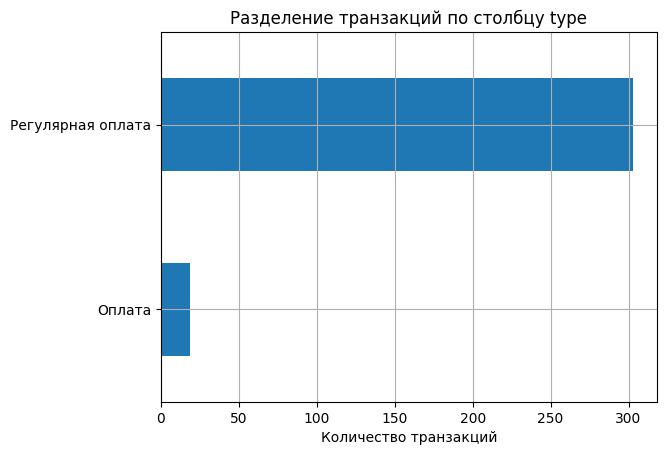

In [123]:
paym_type(declined, 'type')

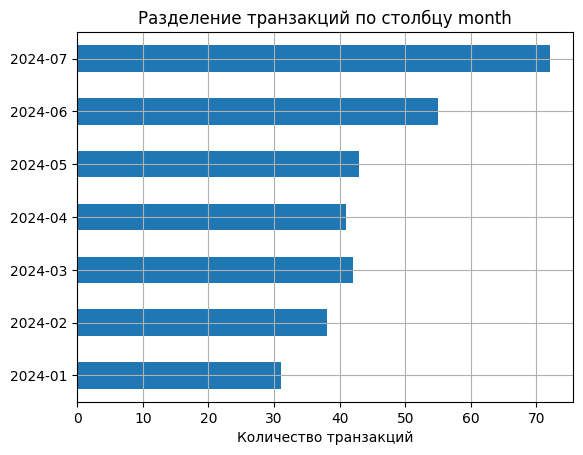

In [124]:
paym_type(declined, 'month')

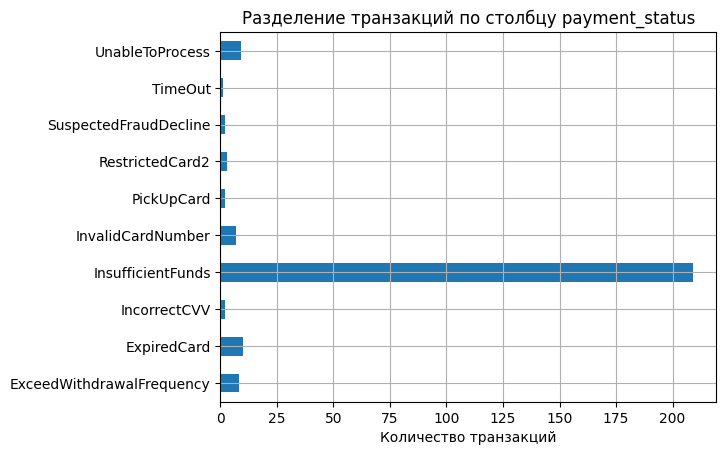

In [125]:
paym_type(declined, 'payment_status')

In [126]:
declined.value_counts('payment_status')

payment_status
InsufficientFunds            209
ExpiredCard                   10
UnableToProcess                9
ExceedWithdrawalFrequency      8
InvalidCardNumber              7
RestrictedCard2                3
IncorrectCVV                   2
PickUpCard                     2
SuspectedFraudDecline          2
TimeOut                        1
Name: count, dtype: int64

In [127]:
declined.query('payment_status == "SuspectedFraudDecline"')

id         action_date action_date2    month      bank  \
126  2108961119 2024-04-19 20:42:00   2024-04-19  2024-04  Тинькофф   
192  2111760234 2024-05-03 18:29:00   2024-05-03  2024-05  Тинькофф   

                 site     order_id                      customer  \
126  prostieveschi.ru  999999999.0  humblehelptope****@gmail.com   
192  prostieveschi.ru  999999999.0        m_ostrovs****@inbox.ru   

                  type  operation_sum operation_currency  comission_sum  \
126  Регулярная оплата          50000                RUB            0.5   
192  Регулярная оплата            500                RUB            0.5   

     final_sum final_currency    status2  comission_% city  \
126       -0.5            RUB  отклонена          3.2  NaN   
192       -0.5            RUB  отклонена          3.2  NaN   

            payment_status  
126  SuspectedFraudDecline  
192  SuspectedFraudDecline

In [128]:
#Сумма несвершившихся оплат
print(f"Сумма упущенных платежей: {declined['operation_sum'].sum()} руб.")

Сумма упущенных платежей: 201563 руб.


Отмененных платежей больше всего в июле, и чаще всего это регулярные платежи.

###Датафрейм completed

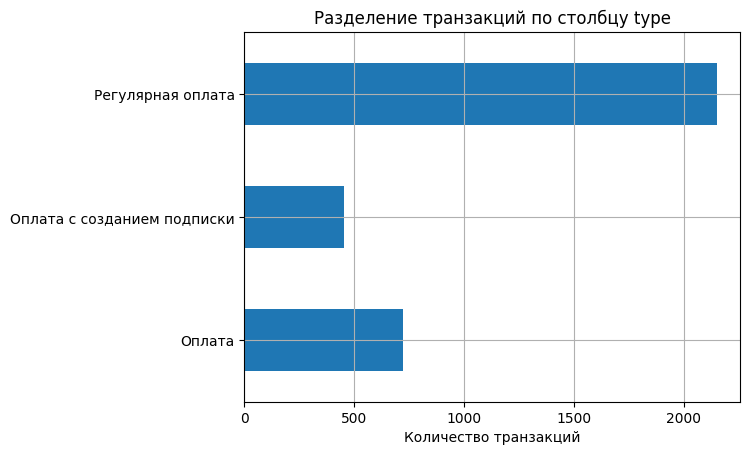

In [129]:
paym_type(completed, 'type')

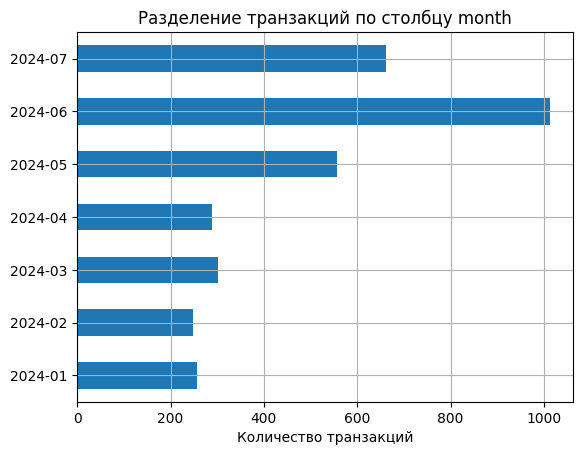

In [130]:
paym_type(completed, 'month')

In [131]:
completed['final_sum'].sum()

2458311.7

In [132]:
completed.groupby('month')['final_sum'].sum()

month
2024-01    124392.63
2024-02    123089.33
2024-03    291027.79
2024-04    210658.83
2024-05    424136.68
2024-06    827029.69
2024-07    457976.75
Name: final_sum, dtype: float64

In [133]:
#Топ 10 городов по проведенным оплатам
completed.value_counts('city').head(10)

city
Москва                230
Санкт-Петербург       173
Екатеринбург           14
Краснодар              11
Вена                    8
Ростов-на-Дону          8
Франкфурт-на-Майне      7
Новосибирск             7
Нижний Новгород         7
Мурманск                7
Name: count, dtype: int64

In [134]:
#Среднее количество транзакций на город
completed.query('~city.isna()').value_counts('city').mean()

4.538461538461538

In [135]:
#Медианное количество транзакций на город
completed.query('~city.isna()').value_counts('city').median()

1.0

In [136]:
completed.query('~city.isna()')['city'].nunique()

156

Оценим клиентов по наличию order_id, возможно наличие order_id связано с оформлением заказа на продукцию компании, отсутствие - на пожертвование

In [137]:
completed.query('order_id !=999999999').value_counts('type')

type
Оплата                         722
Оплата с созданием подписки    445
Name: count, dtype: int64

In [138]:
completed['purchase'] = completed['order_id'] < 999999999

In [139]:
completed.value_counts('purchase')

purchase
False    2159
True     1167
Name: count, dtype: int64

In [140]:
#Количество уникальных клиентов без номера заказа
completed.loc[completed['purchase'] ==False]['customer'].nunique()

710

In [141]:
#Количество уникальных клиентов с номером заказа
completed.loc[completed['purchase'] ==True]['customer'].nunique()

1065

In [142]:
#Всего уникальных клиентов
completed['customer'].nunique()

1476

In [143]:
def assign_category(purchases):
  unique_values = set(purchases)
  if unique_values == {True}:  # Только True
    return 1
  elif unique_values == {False}:  # Только False
    return 2
  else:  # Есть и True, и False
    return 3

In [144]:
categories = completed.groupby('customer')['purchase'].apply(assign_category).reset_index()
categories

customer  purchase
0                     ****@bk.ru         1
1                     ****@de.ru         1
2                    ****@eml.cc         1
3                 ****@gksnab.ru         1
4                 ****@gmail.com         1
...                          ...       ...
1471  zotova.liuda****@yandex.ru         1
1472          zvon****@gmail.com         1
1473           zxc****@yandex.ru         2
1474           zxc2081@yandex.ru         1
1475            zzzz****@mail.ru         3

[1476 rows x 2 columns]

In [145]:
categories.groupby('purchase')['customer'].count()

purchase
1    766
2    411
3    299
Name: customer, dtype: int64

##RFM-анализ

In [146]:
#Определим дату для расчета давности покупки
limit_day = completed['action_date'].max() + timedelta(days=1)
limit_day

Timestamp('2024-08-01 21:34:00')

In [147]:
completed.head()

id         action_date action_date2    month      bank  \
0  2080468405 2024-01-31 20:18:00   2024-01-31  2024-01  Тинькофф   
1  2080039460 2024-01-30 22:18:00   2024-01-30  2024-01  Тинькофф   
2  2079851261 2024-01-30 14:55:00   2024-01-30  2024-01  Тинькофф   
3  2079846986 2024-01-30 14:45:00   2024-01-30  2024-01  Тинькофф   
4  2079829457 2024-01-30 14:09:00   2024-01-30  2024-01  Тинькофф   

               site     order_id             customer               type  \
0  prostieveschi.ru  999999999.0    12ost****@mail.ru  Регулярная оплата   
1  prostieveschi.ru  999999999.0  tigro****@gmail.com  Регулярная оплата   
2  prostieveschi.ru  999999999.0    nat****@gmail.com  Регулярная оплата   
3  prostieveschi.ru  999999999.0  natalk****@inbox.ru  Регулярная оплата   
4  prostieveschi.ru  999999999.0     in****@yandex.ru  Регулярная оплата   

   operation_sum operation_currency  comission_sum  final_sum final_currency  \
0           1000                RUB           32.0      968.0            RUB   
1            200                RUB            6.4      193.6            RUB   
2            300                RUB            9.6      290.4            RUB   
3            700                RUB           22.4      677.6            RUB   
4            500                RUB           16.0      484.0            RUB   

     status2  comission_% city  purchase  
0  завершена          3.2  NaN     False  
1  завершена          3.2  NaN     False  
2  завершена          3.2  NaN     False  
3  завершена          3.2  NaN     False  
4  завершена          3.2  NaN     False

In [148]:
#Сгруппируем данные по клиентам и рассчитаем давность покупки, количество заказов, частоту и доход с клиента.
df_customers = completed.groupby('customer', as_index=False).agg(
    recency=('action_date', lambda x: (limit_day - x.max()).days),
    first_purchase=('action_date', 'min'),  #Дата первой покупки
    last_purchase=('action_date', 'max'), #Дата последней покупки
    total_transactions=('id', 'count'),  # Количество транзакций клиента
    monetary=('final_sum', 'sum')  # Сумма покупок
).reset_index()

# Количество активных месяцев
df_customers['active_period_months'] = ((df_customers['last_purchase'].dt.normalize() - df_customers['first_purchase'].dt.normalize()).dt.days / 30).clip(lower=1)

# Частота переводов
df_customers['frequency'] = (df_customers['total_transactions'] / df_customers['active_period_months']).round(2)

df_customers.sample(5)

index                      customer  recency      first_purchase  \
145     145           Kiasportage@mail.ru       59 2024-06-03 14:04:00   
133     133        J.moscow****@gmail.com       10 2024-06-22 02:15:00   
1379   1379  valeriyavarvar****@gmail.com        5 2024-06-26 22:20:00   
205     205            Nastia****@mail.ru       26 2024-07-06 12:22:00   
856     856       kuryanova****@gmail.con       18 2024-06-14 10:22:00   

           last_purchase  total_transactions  monetary  active_period_months  \
145  2024-06-03 14:04:00                   1     968.0                   1.0   
133  2024-07-22 02:16:00                   2     192.2                   1.0   
1379 2024-07-26 22:20:00                   2     968.0                   1.0   
205  2024-07-06 12:22:00                   1     968.0                   1.0   
856  2024-07-14 10:23:00                   2     387.2                   1.0   

      frequency  
145         1.0  
133         2.0  
1379        2.0  
205         1.0  
856         2.0

In [149]:
df_customers.query('customer == "morozov****@list.ru"')

index             customer  recency      first_purchase  \
1025   1025  morozov****@list.ru       64 2024-03-20 14:08:00   

           last_purchase  total_transactions  monetary  active_period_months  \
1025 2024-05-29 14:05:00                  20    5808.0              2.333333   

      frequency  
1025       8.57

In [150]:
print(f'В датафрейме {df_customers.shape[0]} клиентов')

В датафрейме 1476 клиентов


<Figure size 1400x600 with 0 Axes>

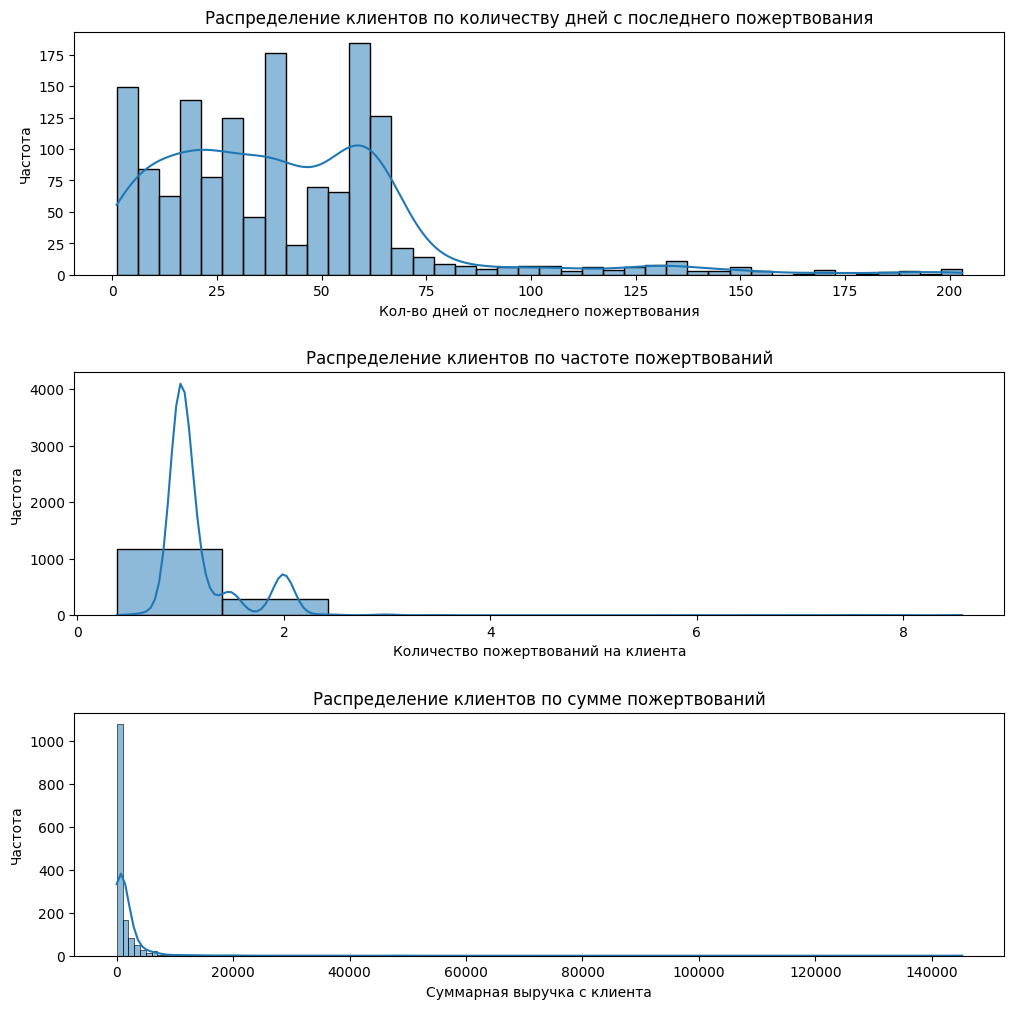

In [151]:
plt.figure(figsize=(14,6))

f, axes = plt.subplots(figsize=(12, 12), nrows=3)

sns.histplot(df_customers['recency'],
             kde=True, binwidth=5,
             ax=axes[0]).set(title= 'Распределение клиентов по количеству дней с последнего пожертвования',
                             xlabel='Кол-во дней от последнего пожертвования',
                             ylabel='Частота')

sns.histplot(df_customers['frequency'],
             kde=True, binwidth=1,
             ax=axes[1]).set(title= 'Распределение клиентов по частоте пожертвований',
                             xlabel='Количество пожертвований на клиента',
                             ylabel='Частота')

sns.histplot(df_customers['monetary'],
             kde=True, binwidth=1000,
             ax=axes[2]).set(title= 'Распределение клиентов по сумме пожертвований',
                             xlabel='Суммарная выручка с клиента',
                             ylabel='Частота')

plt.subplots_adjust(wspace=0, hspace=0.4)
plt.show()

count    1476.000000
mean        1.195549
std         0.444224
min         0.380000
25%         1.000000
50%         1.000000
75%         1.150000
max         8.570000
Name: frequency, dtype: float64


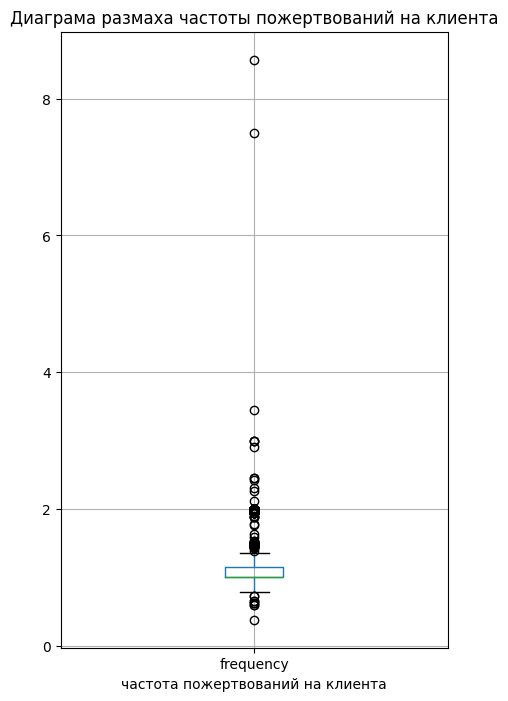

In [152]:
print(df_customers['frequency'].describe())

df_customers[['customer', 'frequency']].boxplot(figsize=(5,8))

plt.title('Диаграма размаха частоты пожертвований на клиента')
plt.xlabel('частота пожертвований на клиента')
plt.show()

count    1476.000000
mean        1.195549
std         0.444224
min         0.380000
25%         1.000000
50%         1.000000
75%         1.150000
max         8.570000
Name: frequency, dtype: float64


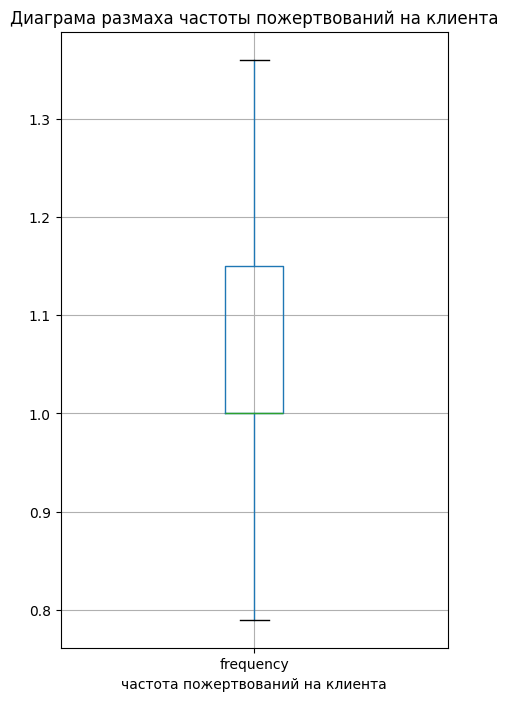

In [153]:
print(df_customers['frequency'].describe())

df_customers[['customer', 'frequency']].boxplot(figsize=(5,8), showfliers=False)

plt.title('Диаграма размаха частоты пожертвований на клиента')
plt.xlabel('частота пожертвований на клиента')
plt.show()

На диаграмме размаха видны выбросы, максимальное частота пожертвований - 8,6 в месяц, медианная частота - 1 заказов в месяц.

Построим точечный график частоты пожертвований по пользователям и посчитаем 95-й и 99-й перцентили частоты заказов на пользователя.

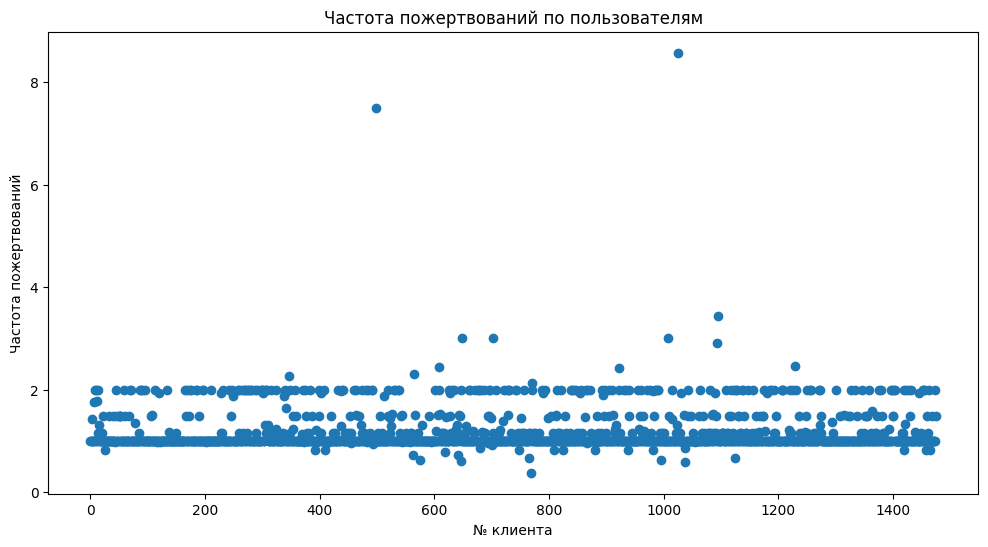

In [154]:
x_values = pd.Series(range(0, len(df_customers)))

plt.figure(figsize=(12,6))
plt.scatter(x_values, df_customers['frequency'])
plt.title('Частота пожертвований по пользователям')
plt.xlabel('№ клиента')
plt.ylabel('Частота пожертвований')
plt.show()

In [155]:
print('95й перцентиль:', round(np.percentile(df_customers['frequency'], 95), 0))
print('99й перцентиль:', round(np.percentile(df_customers['frequency'], 99),0))

95й перцентиль: 2.0
99й перцентиль: 2.0


В целом мы можем сказать, что совершение более 2 пожертвований в месяц не свойственно для наших клиентов. Клиентов, совершшающих более 2 пожертвований в месяц менее 1%.

Оценим данные по выручке с клиента.

count      1476.000000
mean       1665.522832
std        5376.766771
min           6.100000
25%         387.200000
50%         672.700000
75%        1379.400000
max      145200.000000
Name: monetary, dtype: float64


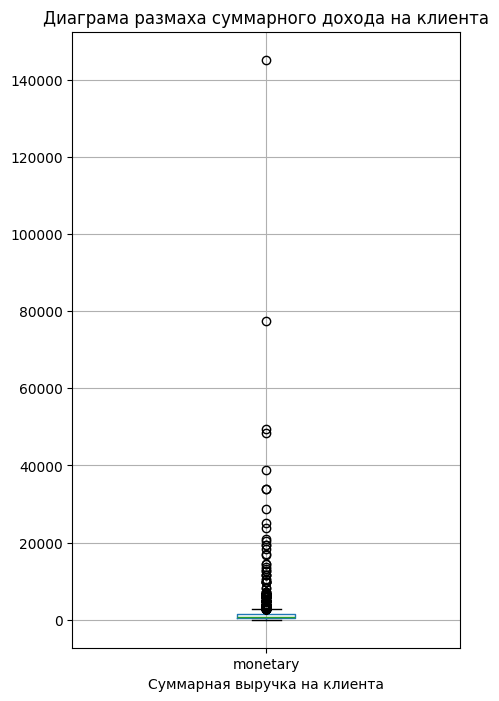

In [156]:
print(df_customers['monetary'].describe())

df_customers[['customer', 'monetary']].boxplot(figsize=(5,8))

plt.title('Диаграма размаха суммарного дохода на клиента')
plt.xlabel('Суммарная выручка на клиента')
plt.show()

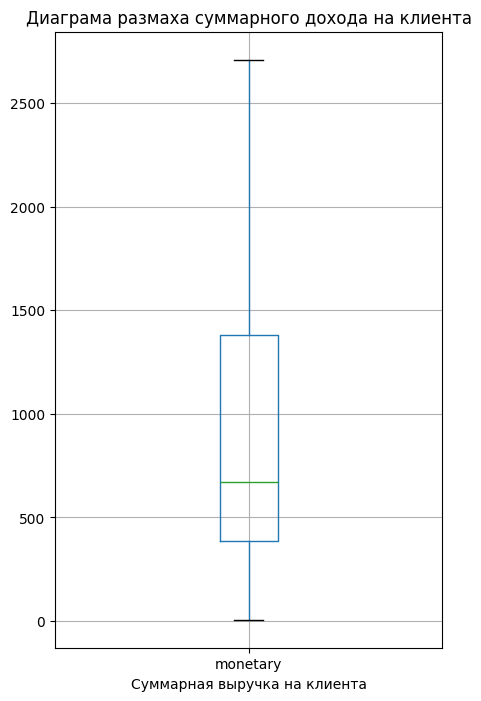

In [157]:
df_customers[['customer', 'monetary']].boxplot(figsize=(5,8), showfliers=False)

plt.title('Диаграма размаха суммарного дохода на клиента')
plt.xlabel('Суммарная выручка на клиента')
plt.show()

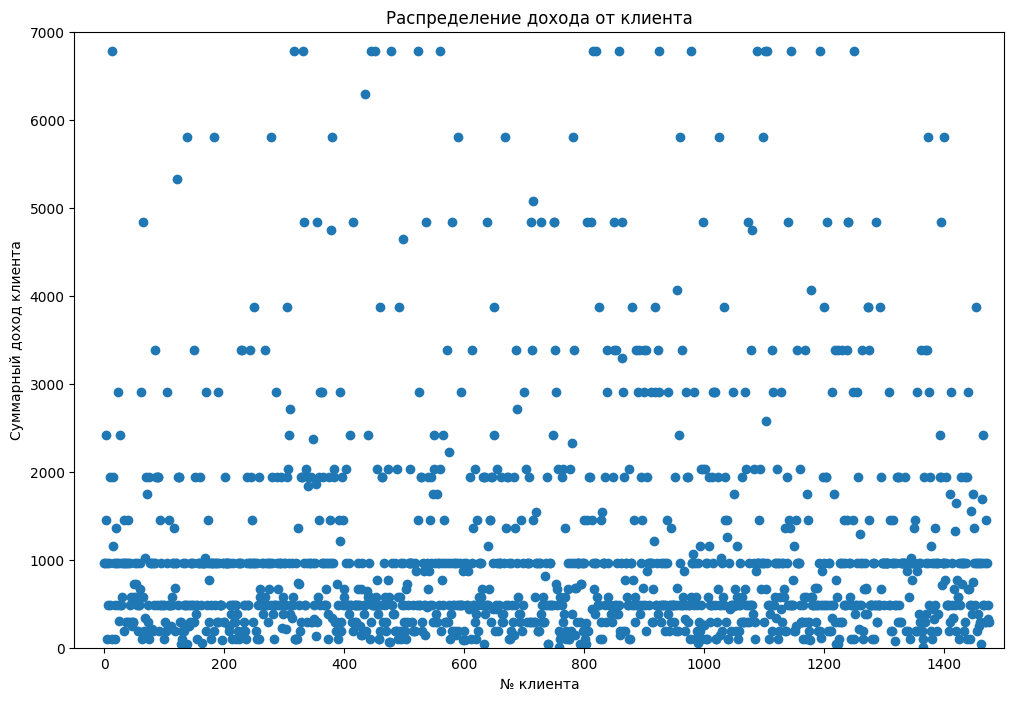

In [158]:
#Ограничим ось Y до суммы 7000 руб.на клиента
x_values = pd.Series(range(0, len(df_customers)))

plt.figure(figsize=(12,8))
plt.scatter(x_values, df_customers['monetary'])
plt.title('Распределение дохода от клиента')
plt.xlabel('№ клиента')
plt.ylabel('Суммарный доход клиента')
plt.axis([-50, 1500, 0, 7000])
plt.show()

In [159]:
print('95й перцентиль:', round(np.percentile(df_customers['monetary'], 95), 0))
print('99й перцентиль:', round(np.percentile(df_customers['monetary'], 99),0))

95й перцентиль: 4840.0
99й перцентиль: 17303.0


Медианное значение дохода с клиента - 672 руб., В 95% случаев клиенты переводили суммарно до 4 840 руб за 7 месяцев. В 99% случаев клиенты переводили суммарно до 17 303 руб за 7 месяцев. Но есть клиенты, переводившие суммарно и 140 000 руб. и 79 000.



Разделение клиентов на группы:

R - давность последнего перевода, 1 - недавно (0 - 31 день назад), 2 - средняя давность (32-91 день назад), 3 - давно (91-203 дня назад)

F - частота заказов в месяц, 1 - 1 заказ, 2 - 2 заказа, 3 - более 2х заказов

M - сумма пожертвований, 1 - 1-1000 руб., 2 - 1001-5000 руб., 3 - 5001-145200руб.

In [160]:
#Создадим маркировку для сегментов
r_labels = range(3, 0, -1); f_labels = range(1, 4); m_labels = range(1, 4)

#Разделим данные в столбце recency на 3 группы
r_groups = pd.cut(df_customers['recency'], bins=[0, 31, 91, 203], labels=r_labels)
#Разделим данные в столбце frequency на 4 группы
f_groups = pd.cut(df_customers['frequency'],  bins=[0, 1, 2, 9], labels=f_labels)
#Разделим данные в столбце monetary на 3 группы
m_groups = pd.cut(df_customers['monetary'], bins=[0, 1000, 5000, 145200], labels=m_labels)

In [161]:
#Применим разделение к датафрейму
df_customers = df_customers.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [162]:
df_customers.sample(10)

index                    customer  recency      first_purchase  \
1359   1359         tutmo****@gmail.com       23 2024-07-09 17:14:00   
1274   1274     simagavri****@gmail.com        6 2024-05-26 02:14:00   
1155   1155         osenz****@gmail.com       15 2024-01-17 21:13:00   
1058   1058  nastenka0810****@gmail.com       40 2024-06-22 21:31:00   
46       46             Ajs****@mail.ru       34 2024-06-28 20:45:00   
1050   1050          nadine****@mail.ru        5 2024-01-27 15:32:00   
1074   1074       natadem****@gmail.com       40 2024-06-22 10:17:00   
704     704              hyakov@mail.ru       58 2024-06-04 10:01:00   
552     552            dfuf****@mail.ru       40 2024-06-22 14:43:00   
712     712            in****@yandex.ru        2 2024-01-30 14:09:00   

           last_purchase  total_transactions  monetary  active_period_months  \
1359 2024-07-09 17:14:00                   1     968.0              1.000000   
1274 2024-07-26 02:14:00                   3    1452.0              2.033333   
1155 2024-07-17 21:13:00                   7    3388.0              6.066667   
1058 2024-06-22 21:31:00                   1     193.6              1.000000   
46   2024-06-28 20:45:00                   1     242.0              1.000000   
1050 2024-07-27 15:33:00                   6    1742.4              6.066667   
1074 2024-06-22 10:17:00                   1     968.0              1.000000   
704  2024-06-04 10:01:00                   1     290.4              1.000000   
552  2024-06-22 14:43:00                   1     290.4              1.000000   
712  2024-07-30 14:09:00                   7    3388.0              6.066667   

      frequency  R  F  M  
1359       1.00  3  1  1  
1274       1.48  3  2  2  
1155       1.15  3  2  2  
1058       1.00  2  1  1  
46         1.00  2  1  1  
1050       0.99  3  1  2  
1074       1.00  2  1  1  
704        1.00  2  1  1  
552        1.00  2  1  1  
712        1.15  3  2  2

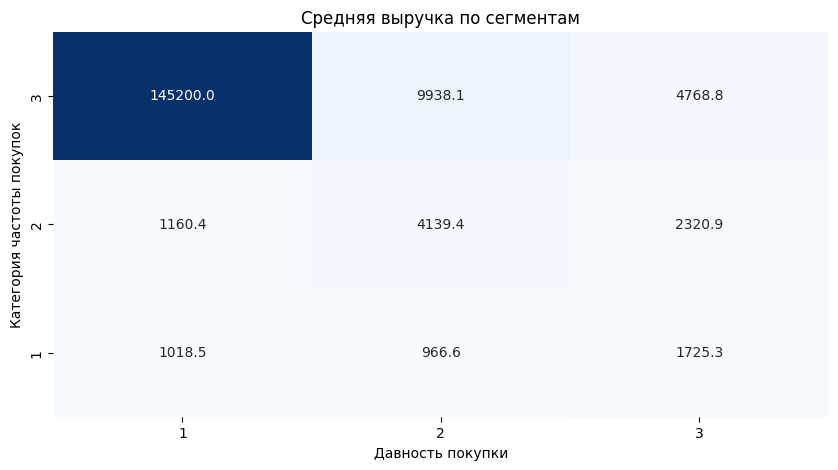

In [163]:
#Выведем тепловую карту по R (recency) и F (frequency) со средних покупок
rfm_table = df_customers.pivot_table(index='F',
                                    columns='R',
                                    values='monetary',
                                    aggfunc='mean',
                                    observed=False)

plt.figure(figsize=(10,5))
sns.heatmap(rfm_table, annot=True,fmt='.1f', cmap='Blues', cbar=False)


plt.title('Средняя выручка по сегментам')
plt.xlabel('Давность покупки')
plt.ylabel('Категория частоты покупок')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Для наглядности поставим ограничение в столбце monetary в 20 000 руб.

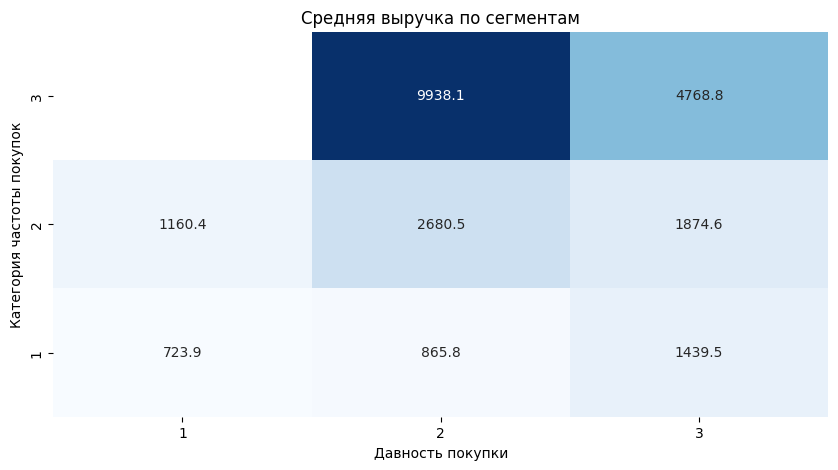

In [164]:
plt.figure(figsize=(10,5))
sns.heatmap(df_customers.loc[df_customers['monetary'] < 20000].pivot_table(index='F',
                                    columns='R',
                                    values='monetary',
                                    aggfunc='mean',
                                    observed=False), annot=True,fmt='.1f', cmap='Blues', cbar=False)


plt.title('Средняя выручка по сегментам')
plt.xlabel('Давность покупки')
plt.ylabel('Категория частоты покупок')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [165]:
#Распределим клиентов на группы с помощью регулярных выражений
segm_map={
    r'3[1-3]3' : 'VIP клиенты',
    r'3[1-3][1-2]' : 'лояльные',
    r'1[1-2][1-3]' : 'ушедшие',
    r'2[1-3][1-3]' : 'спящие',
    r'[1-2][2-3]3' : 'VIP (ушедшие)',

}

#Соединим в один столбец значения из столбцов R, F и M
df_customers['RFM'] = df_customers['R'].astype(str)+df_customers['F'].astype(str)+df_customers['M'].astype(str)

#Добавим столбец с названием сегмента на основании столбца RFM
df_customers['segment'] = df_customers['RFM'].replace(segm_map, regex=True)

Добавим столбец со средним чеком на клиента.

In [166]:
df_customers['avg_bill'] = df_customers['monetary'] / df_customers['total_transactions']
df_customers.sample(5)

index                 customer  recency      first_purchase  \
1107   1107     nj.kaz****@yandex.ru       66 2024-05-27 16:19:00   
1013   1013     mjacov****@gmail.com       63 2024-05-30 19:56:00   
1304   1304            sou****@bk.ru       41 2024-06-20 21:35:00   
1306   1306    spacumo****@gmail.com       66 2024-05-27 14:50:00   
957     957  maria.tre****@gmail.com       92 2024-01-01 11:32:00   

           last_purchase  total_transactions  monetary  active_period_months  \
1107 2024-05-27 16:19:00                   1      96.1              1.000000   
1013 2024-05-30 19:56:00                   1    1936.0              1.000000   
1304 2024-06-20 21:35:00                   1     968.0              1.000000   
1306 2024-05-27 14:50:00                   1     968.0              1.000000   
957  2024-05-01 11:32:00                   5    2420.0              4.033333   

      frequency  R  F  M  RFM  segment  avg_bill  
1107       1.00  2  1  1  211   спящие      96.1  
1013       1.00  2  1  2  212   спящие    1936.0  
1304       1.00  2  1  1  211   спящие     968.0  
1306       1.00  2  1  1  211   спящие     968.0  
957        1.24  1  2  2  122  ушедшие     484.0

In [167]:
#Добавим информацию по сегментам для визуализации в Tableau
completed = completed.merge(df_customers[['customer', 'RFM', 'segment','R', 'F', 'M']], how='left', on='customer')
completed.sample(5)

id         action_date action_date2    month      bank  \
1971  2120638749 2024-06-22 13:14:00   2024-06-22  2024-06  Тинькофф   
641   2100269649 2024-03-16 22:37:00   2024-03-16  2024-03  Тинькофф   
860   2109682230 2024-04-23 12:02:00   2024-04-23  2024-04  Тинькофф   
2762  2126497339 2024-07-27 19:15:00   2024-07-27  2024-07  Тинькофф   
1808  2121368596 2024-06-26 20:38:00   2024-06-26  2024-06  Тинькофф   

                  site     order_id                     customer  \
1971  prostieveschi.ru      22313.0  Yuliya-kruzha****@yandex.ru   
641   prostieveschi.ru  999999999.0     cooloorta.****@gmail.com   
860   prostieveschi.ru  999999999.0           irin****@yandex.ru   
2762  prostieveschi.ru      23501.0       maryanaz****@gmail.com   
1808  prostieveschi.ru      22534.0              Irk****@mail.ru   

                   type  operation_sum  ... final_currency    status2  \
1971             Оплата            500  ...            RUB  завершена   
641   Регулярная оплата            500  ...            RUB  завершена   
860   Регулярная оплата            100  ...            RUB  завершена   
2762             Оплата            300  ...            RUB  завершена   
1808             Оплата           1000  ...            RUB  завершена   

      comission_%             city purchase  RFM   segment  R  F  M  
1971          3.2        Геленджик     True  211    спящие  2  1  1  
641           3.2              NaN    False  111   ушедшие  1  1  1  
860           3.2              NaN    False  222    спящие  2  2  2  
2762          3.2      Новоуральск     True  321  лояльные  3  2  1  
1808          3.2  Санкт-Петербург     True  211    спящие  2  1  1  

[5 rows x 23 columns]

Сгруппируем данные по выделенным сегментам и рассчитаем:
- среднее количество дней с последней покупки
- среднее количество покупок
- среднюю выручку
- количество клиентов в сегменте
- размер среднего чека

In [168]:
rfm_customers = df_customers.groupby('segment', as_index=False).agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count', 'sum'],
    'avg_bill': 'mean'
}).round(1)

rfm_customers.columns = rfm_customers.columns.droplevel()
rfm_customers.columns = [
    'segment', 'avg_days_after_buy', 'avg_freq_purchases', 'avg_revenue', 'customer_qnt', 'total_revenue', 'avg_bill'
]
rfm_customers

segment  avg_days_after_buy  avg_freq_purchases  avg_revenue  \
0  VIP (ушедшие)               135.0                 3.0     145200.0   
1    VIP клиенты                15.1                 1.2      11825.9   
2       лояльные                16.4                 1.4       1249.3   
3         спящие                53.3                 1.0       1138.3   
4        ушедшие               135.0                 1.1       1050.4   

   customer_qnt  total_revenue  avg_bill  
0             1       145200.0   48400.0  
1            54       638600.5    2898.8  
2           584       729562.2     470.7  
3           748       851462.5     963.4  
4            89        93486.4     867.3

In [169]:
#Сгруппируем данные по месяцу и сегменту и расчитаем средний чек и сумму продаж
df_segm_month = completed.groupby(['month','segment'],
                                  as_index=False).agg({'final_sum': ['mean', 'sum']})

df_segm_month.columns = df_segm_month.columns.droplevel()
df_segm_month.columns = ('month', 'segment', 'avg_bill', 'revenue')
df_segm_month[['avg_bill', 'revenue']] = df_segm_month[['avg_bill', 'revenue']].round(0).astype('int')
df_segm_month.head(10)

month        segment  avg_bill  revenue
0  2024-01    VIP клиенты      1274    57329
1  2024-01       лояльные       287    48294
2  2024-01         спящие       566     7353
3  2024-01        ушедшие       381    11418
4  2024-02    VIP клиенты      1271    59749
5  2024-02       лояльные       286    48535
6  2024-02         спящие       558     7256
7  2024-02        ушедшие       419     7549
8  2024-03  VIP (ушедшие)     48400   145200
9  2024-03    VIP клиенты      1223    59933

In [170]:
cat_colors = {'VIP клиенты' : '#6d1b65',
              'VIP (ушедшие)': '#b59aa9',
              'лояльные' : '#098a9a',
              'перспективные': '#7ebdaf',
              'ушедшие': '#d8343e',
              'спящие': '#b5b5b5'
              }

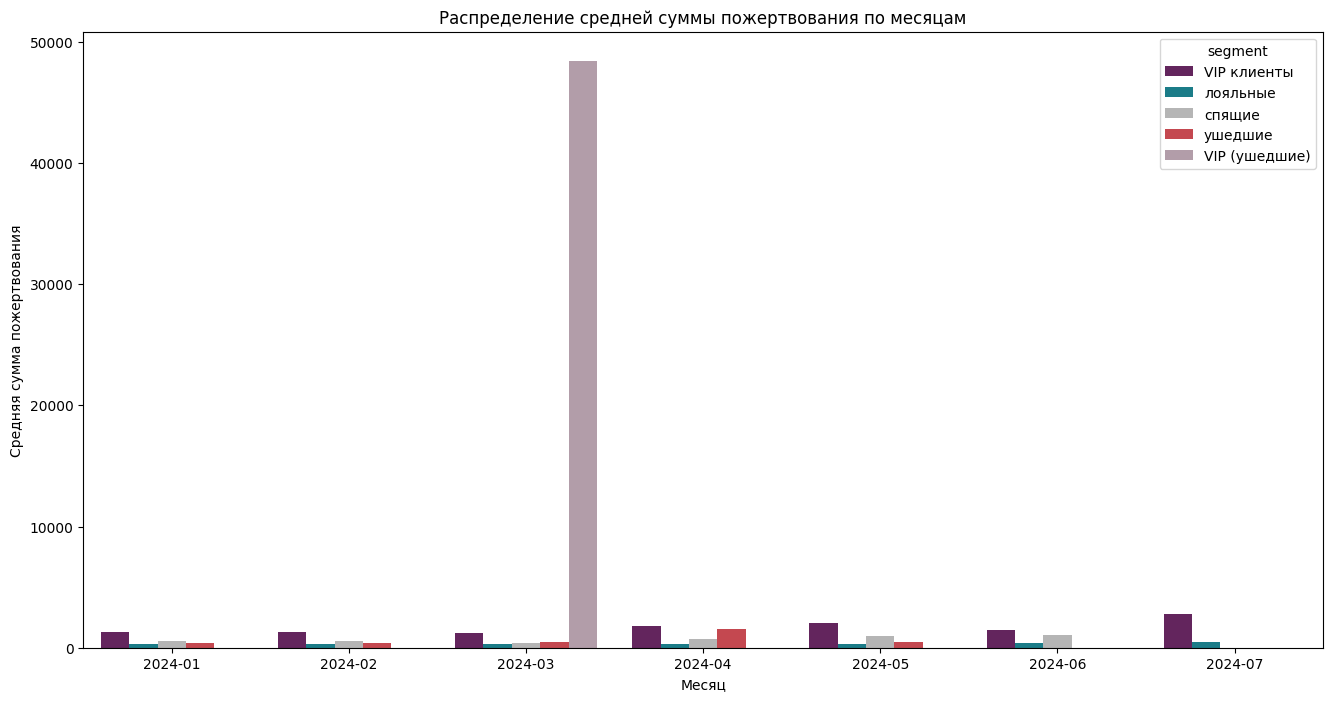

In [171]:
plt.figure(figsize=(16,8))
sns.barplot(data=df_segm_month,
             x='month',
                   y='avg_bill',
                   hue='segment',
                  palette= cat_colors
                  )


plt.title('Распределение средней суммы пожертвования по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя сумма пожертвования')

plt.show()

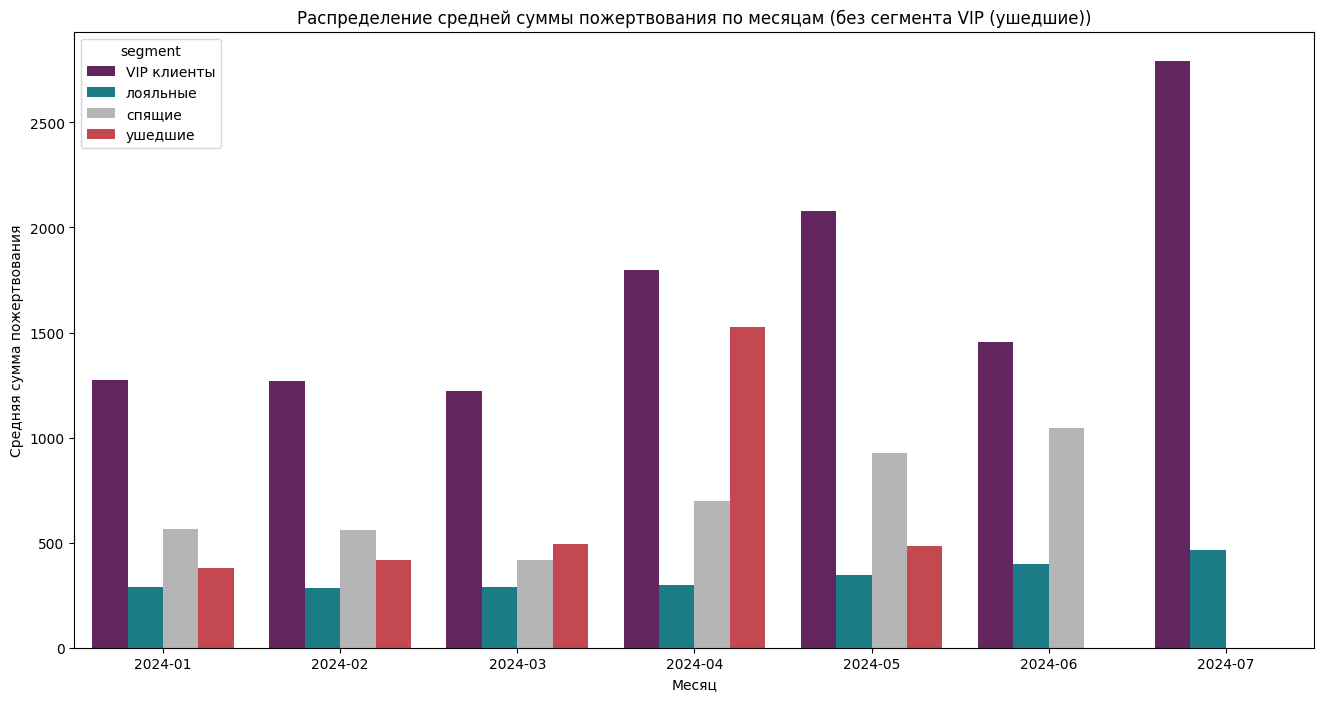

In [172]:
#Исключим сегмент VIP (ушедшие)
plt.figure(figsize=(16,8))
sns.barplot(data=df_segm_month.loc[df_segm_month['segment'] !="VIP (ушедшие)"],
             x='month',
                   y='avg_bill',
                   hue='segment',
                  palette=cat_colors
                  )

plt.title('Распределение средней суммы пожертвования по месяцам (без сегмента VIP (ушедшие))')
plt.xlabel('Месяц')
plt.ylabel('Средняя сумма пожертвования')
plt.show()

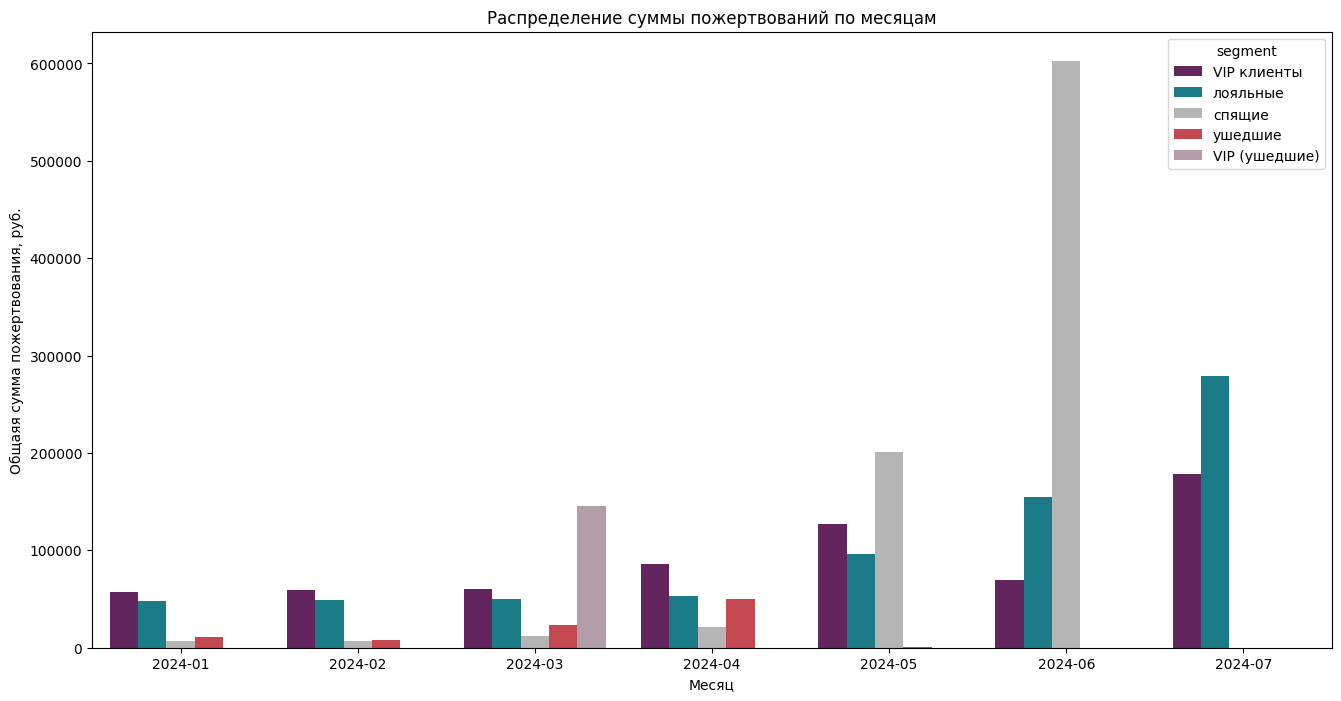

In [173]:
plt.figure(figsize=(16,8))
sns.barplot(data=df_segm_month,
             x='month',
                   y='revenue',
                   hue='segment',
                  palette=cat_colors
                  )
plt.title('Распределение суммы пожертвований по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Общаяя сумма пожертвования, руб.')

plt.show()

У нас получилось 5 сегментов клиентов
1.	**лояльные** - это клиенты, делавшие пожертвования недавно, до 31 день назад, 1-2 перевода в месяц, суммарных переводов до 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 16 дней, средняя частота перечислений месяц 1.4, количество клиентов в этом сегменте 584. Средний чек 470 руб, общая сумма 729 562 р.
2.	**VIP клиенты** - это клиенты, делавшие пожертвования недавно, до 31 день назад, 1-2 перевода в месяц, суммарных переводов от 5000 руб. до 145 200 руб. У этого сегмента в среднем со дня перечисления прошло около 15 дней, средняя частота перечислений месяц 1.2, количество клиентов в этом сегменте 54. Средний чек почти 2900 руб., общая сумма 638 600 р.
3.	**спящие** - это клиенты, делавшие пожертвования относительно давно, 32-91 день назад, 1-2 перевода в месяц, суммарных переводов до 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 53 дней, средняя частота перечислений в месяц 1, количество клиентов в этом сегменте 748. Средний чек 963 руб, общая сумма 851 462 р.
4.	**ушедшие** - это клиенты, делавшие пожертвования давно, более 91 дней назад, суммарных переводов до 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 135 дней, средняя частота перечислений в месяц 1, количество клиентов в этом сегменте 89. Средний чек 867 руб, общая сумма 93 486 р.
5.	**VIP (ушедшие)** - это клиенты, делавшие пожертвования давно, более 91 дней назад, суммарных переводов более 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 135 дней, средняя частота перечислений в месяц 3, количество клиентов в этом сегменте 1. Средний чек 48 400 руб, общая сумма 145 200р.

Можно отметить, что в июне был всплеск по суммарным пожертвованиям, но это были клиенты из сегменты спящие, и поэтому в июле этих платежей мы уже не наблюдаем.

Также можно отметить что к июлю вырос средний чек у сегмента VIP и до июня рос средний чек у сегмента спящие. Средний чек лояльных клиентов почти не вырос. Здесь можно рекомендовать мотивировать клиентов из сегмента лояльные покупать продукцию фонда, для получения дополнительного финансирования из этого сегмента.
Также важная задача переводить спящих клиентов в лояльных


##Когортный анализ

In [174]:
#Подготовим датафрейм с информацией о первых переводах клиентов
profiles = completed[['action_date', 'customer']].copy()

In [175]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   action_date  3326 non-null   datetime64[ns]
 1   customer     3326 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 52.1+ KB


In [176]:
profiles = (
    completed.sort_values(by=['customer', 'action_date'])
    .groupby('customer')
    .agg({
        'action_date' : 'first',
    }).rename(columns={'action_date': 'first_ts'}).reset_index()
)

In [177]:
 profiles['month_dt'] = profiles['first_ts'].values.astype('datetime64[M]')
 profiles.head()

customer            first_ts   month_dt
0      ****@bk.ru 2024-06-13 18:33:00 2024-06-01
1      ****@de.ru 2024-07-04 16:36:00 2024-07-01
2     ****@eml.cc 2024-06-17 14:33:00 2024-06-01
3  ****@gksnab.ru 2024-05-07 22:50:00 2024-05-01
4  ****@gmail.com 2024-06-15 01:47:00 2024-06-01

In [178]:
#Добавим информацию для визуализации в Tableau

completed = completed.merge(profiles[['customer', 'first_ts']], how='left', on='customer')
completed.head()

id         action_date action_date2    month      bank  \
0  2080468405 2024-01-31 20:18:00   2024-01-31  2024-01  Тинькофф   
1  2080039460 2024-01-30 22:18:00   2024-01-30  2024-01  Тинькофф   
2  2079851261 2024-01-30 14:55:00   2024-01-30  2024-01  Тинькофф   
3  2079846986 2024-01-30 14:45:00   2024-01-30  2024-01  Тинькофф   
4  2079829457 2024-01-30 14:09:00   2024-01-30  2024-01  Тинькофф   

               site     order_id             customer               type  \
0  prostieveschi.ru  999999999.0    12ost****@mail.ru  Регулярная оплата   
1  prostieveschi.ru  999999999.0  tigro****@gmail.com  Регулярная оплата   
2  prostieveschi.ru  999999999.0    nat****@gmail.com  Регулярная оплата   
3  prostieveschi.ru  999999999.0  natalk****@inbox.ru  Регулярная оплата   
4  prostieveschi.ru  999999999.0     in****@yandex.ru  Регулярная оплата   

   operation_sum  ...    status2  comission_%  city purchase  RFM  \
0           1000  ...  завершена          3.2   NaN    False  323   
1            200  ...  завершена          3.2   NaN    False  322   
2            300  ...  завершена          3.2   NaN    False  322   
3            700  ...  завершена          3.2   NaN    False  322   
4            500  ...  завершена          3.2   NaN    False  322   

       segment  R  F  M            first_ts  
0  VIP клиенты  3  2  3 2024-01-31 20:18:00  
1     лояльные  3  2  2 2024-01-30 22:18:00  
2     лояльные  3  2  2 2024-01-30 14:55:00  
3     лояльные  3  2  2 2024-01-30 14:45:00  
4     лояльные  3  2  2 2024-01-30 14:09:00  

[5 rows x 24 columns]

In [179]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   customer  1476 non-null   object        
 1   first_ts  1476 non-null   datetime64[ns]
 2   month_dt  1476 non-null   datetime64[s] 
dtypes: datetime64[ns](1), datetime64[s](1), object(1)
memory usage: 34.7+ KB


###Функция для расчета Retention Rate

In [180]:
def get_retention(
    profiles, sessions, observation_date, horizon_months, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - pd.DateOffset(months=horizon_months - 1
        )
    result_raw = profiles.query('month_dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['customer', 'action_date']], on='customer', how='left'
    )
    result_raw['lifetime'] = (
        (result_raw['action_date'].dt.to_period('M')) - (result_raw['first_ts'].dt.to_period('M'))
        ).apply(lambda x: x.n)

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['month_dt'], columns='lifetime', values='customer', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('month_dt')
        .agg({'customer': 'nunique'})
        .rename(columns={'customer': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='month_dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_months))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

In [181]:
observation_date = profiles['month_dt'].max()
horizon_months = profiles['month_dt'].nunique()

retention_raw, retention = get_retention(profiles, completed,observation_date, horizon_months, ignore_horizon=True)
retention

cohort_size    0         1         2         3         4  \
month_dt                                                               
2024-01-01          251  1.0  0.916335  0.892430  0.840637  0.844622   
2024-02-01           12  1.0  0.583333  0.750000  0.666667  0.500000   
2024-03-01           52  1.0  0.230769  0.288462  0.173077  0.211538   
2024-04-01           42  1.0  0.309524  0.285714  0.238095  0.000000   
2024-05-01          275  1.0  0.334545  0.356364  0.000000  0.000000   
2024-06-01          698  1.0  0.226361  0.000000  0.000000  0.000000   
2024-07-01          146  1.0  0.000000  0.000000  0.000000  0.000000   

                   5         6  
month_dt                        
2024-01-01  0.657371  0.828685  
2024-02-01  0.583333  0.000000  
2024-03-01  0.000000  0.000000  
2024-04-01  0.000000  0.000000  
2024-05-01  0.000000  0.000000  
2024-06-01  0.000000  0.000000  
2024-07-01  0.000000  0.000000

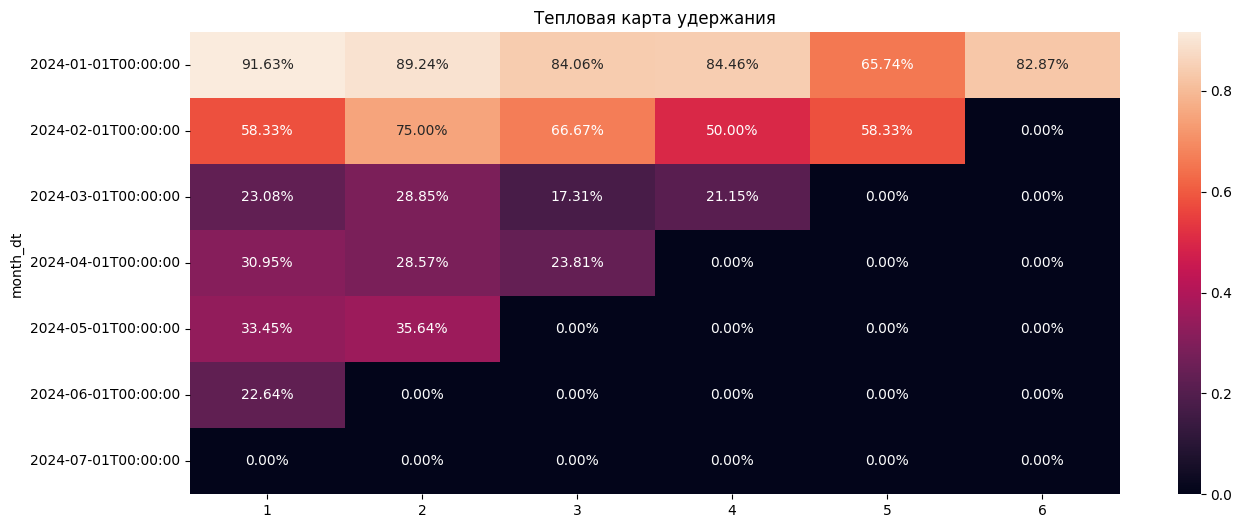

In [182]:
plt.figure(figsize = (15, 6))
sns.heatmap(retention.drop(columns = ['cohort_size', 0]), # удаляем размеры когорт
            annot = True,
            fmt = '.2%'
           )
plt.title('Тепловая карта удержания')
plt.show()

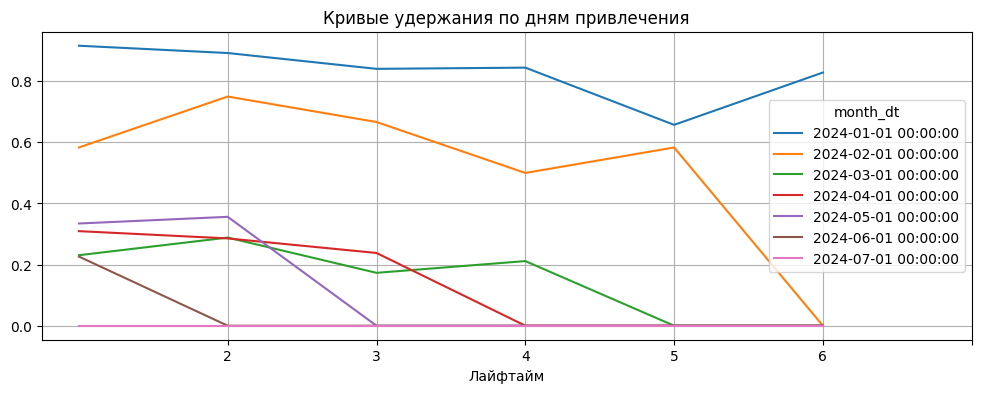

In [183]:
report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,
    xticks=list(report.columns.values),
    figsize=(12, 4),
)
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания по дням привлечения')
plt.show()

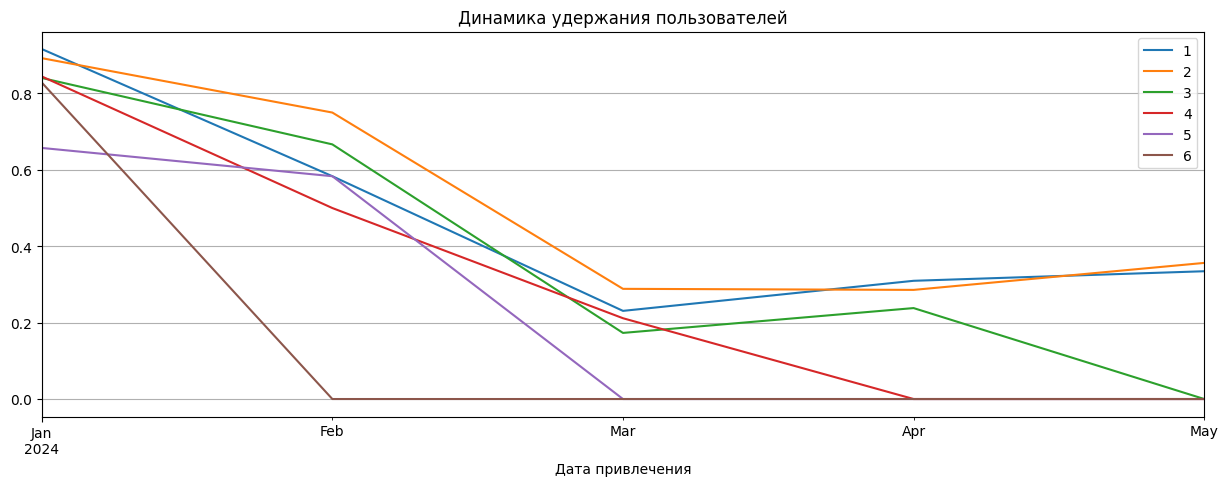

In [184]:
#Ограничим данный маем
report.query('month_dt < "2024-06-01"').plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

**Самые многочисленные когорты – когорты января, мая и июня.**

**Январская когорта** показывает наивысший уровень удержания клиентов, вероятнее всего это постоянные клиенты, отчислявшие деньги и ранее.  Начиная с марта коэффициент удержания сильно падает. **С февраля по апрель** наименьший размер когорт.

**В мае и июне** пришло много новых клиентов и у них достаточно высокая средняя сумма месячных пожертвований на старте в сравнении с январем и февралем.

###Функция LTV

In [185]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_months,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - pd.DateOffset(months=horizon_months - 1
        )

    result_raw = profiles.query('month_dt <= @last_suitable_acquisition_date')

    # Добваляем данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['customer', 'action_date', 'final_sum']],
        on='customer',
        how='left',
    )

    #Рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        (result_raw['action_date'].dt.to_period('M')) - (result_raw['first_ts'].dt.to_period('M'))
        ).apply(lambda x: x.n)

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_months):

        # Строим таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='final_sum',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Рассчитаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'customer': 'nunique'})
            .rename(columns={'customer': 'cohort_size'})
        )

        # Объединим размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Посчитаем LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_months))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_months)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['month_dt'], horizon_months
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

In [186]:
horizon_months = 7
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, completed, observation_date, horizon_months, ignore_horizon=True
)

ltv_history

cohort_size            0            1            2            3  \
month_dt                                                                      
2024-01-01          251   495.588167   963.811394  1408.160518  1869.092908   
2024-02-01           12   463.775000   758.150000  1100.925000  1435.691667   
2024-03-01           52  3383.916538  3680.831923  4427.190385  4535.357692   
2024-04-01           42  1795.521429  2864.914286  3002.032381  3570.084762   
2024-05-01          275   765.918945   942.553709  1131.174073  1131.174073   
2024-06-01          698   948.769341  1053.840344  1053.840344  1053.840344   
2024-07-01          146  1141.531644  1141.531644  1141.531644  1141.531644   

                      4            5            6  
month_dt                                           
2024-01-01  2370.155179  2773.729960  3267.365697  
2024-02-01  1730.125000  2032.566667  2032.566667  
2024-03-01  4818.298077  4818.298077  4818.298077  
2024-04-01  3570.084762  3570.084762  3570.084762  
2024-05-01  1131.174073  1131.174073  1131.174073  
2024-06-01  1053.840344  1053.840344  1053.840344  
2024-07-01  1141.531644  1141.531644  1141.531644

In [187]:
ltv

cohort_size          0            1            2            3  \
cohort                                                                     
All users         1476  962.64622  1168.150793  1311.839905  1412.919939   

                     4            5            6  
cohort                                            
All users  1510.489539  1581.578001  1665.522832

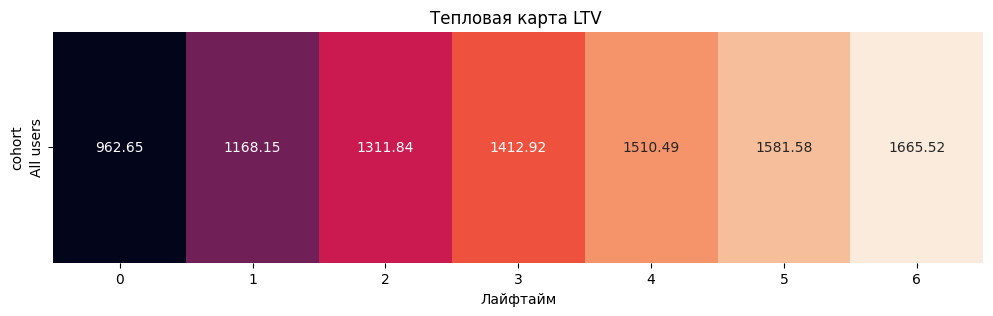

In [188]:
plt.figure(figsize=(12, 3))
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f', cbar=False)
plt.title('Тепловая карта LTV ')
plt.xlabel('Лайфтайм')
plt.show()

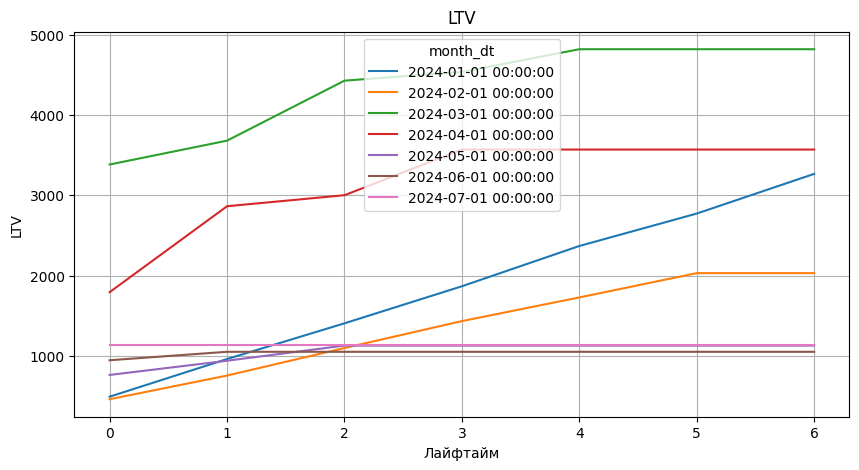

In [189]:
# строим кривые LTV

report = ltv_history.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5))
plt.title('LTV')
plt.ylabel('LTV')
plt.xlabel('Лайфтайм')
plt.show()

За счет своей многочисленности **июньская когорта принесла наивысшую выручку в первый месяц** и за два месяца она дает суммарную выручку на уровне 6 месяцев 1й когорты.

**Мартовская когорта** при своей малочисленности дает высокий LTV, это связано с большим платежом от клиента humblehelptope****@gmail.com на сумму 145 200 руб.

**Майская когорта** вторая по численности и по прибыльности на старте.

##Маркетинговый анализ

In [190]:
#Рассчитаем среднее количество уникальных жертвователей в день (DAU) за весь период
dau_total = completed.groupby('action_date2').agg({'customer': 'nunique'}).mean().astype('int')

dau_total

customer    15
dtype: int64

In [191]:
def dynamics_plt(df, col, type):
  df.groupby(col).agg({'customer': 'nunique'}).plot(grid=True, figsize=(15, 5))

  if type == 'day':
    period = 'день'
  elif type == 'month':
    period = 'месяц'
  elif type == 'year':
    period = 'год'

  else:
    period = type

  plt.title(f'Динамика уникальных жертвователей в {period}')
  plt.ylabel('Количество уникальных пользователей')
  plt.xlabel(f'{period}')
  plt.show()

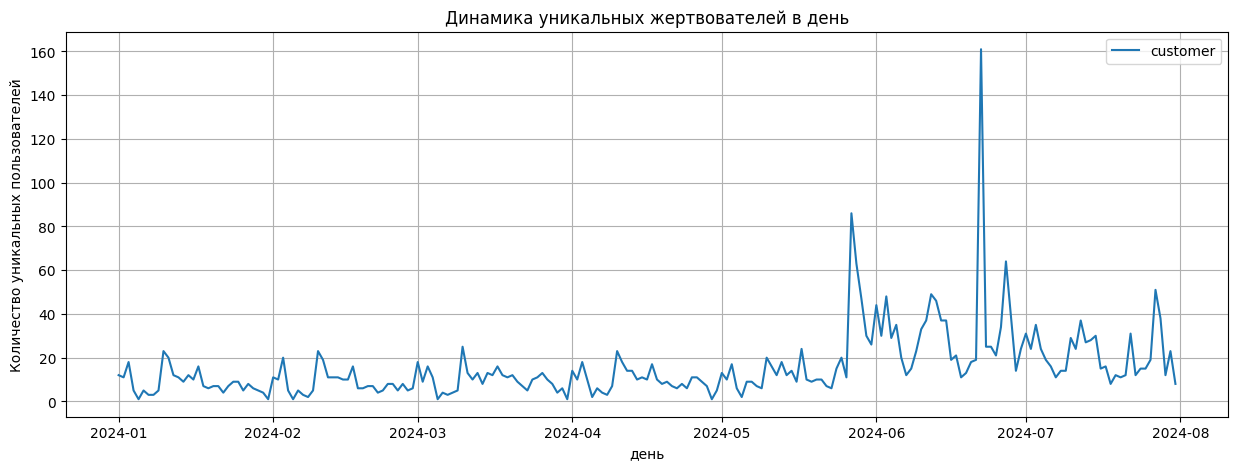

In [192]:
dynamics_plt(completed, 'action_date2', 'day')

In [193]:
#Рассчитаем количество уникальных жертвователей в месяц (MAU)
mau_total = completed.groupby('month').agg({'customer': 'nunique'}).mean().astype('int')

mau_total

customer    456
dtype: int64

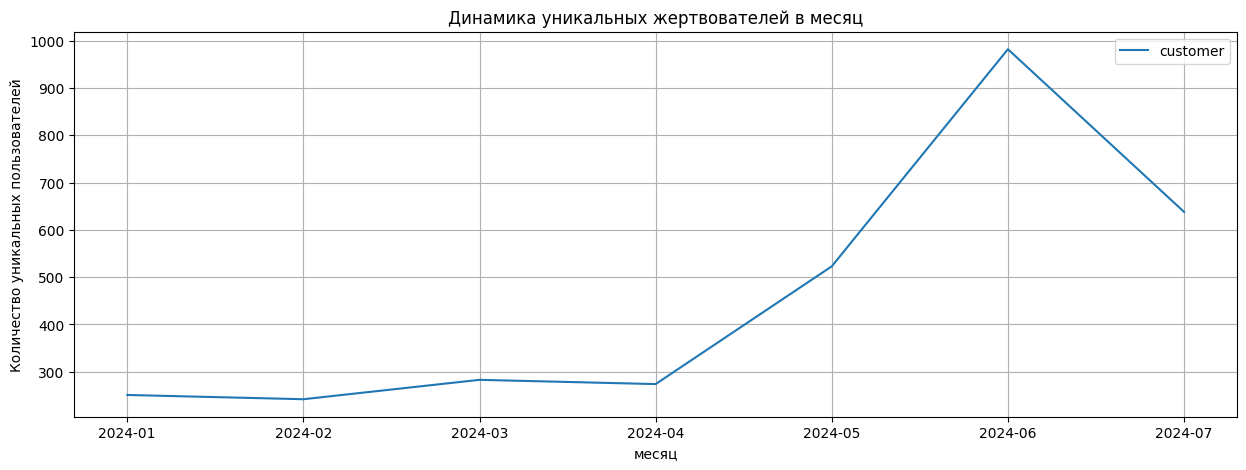

In [194]:
dynamics_plt(completed, 'month', 'month')

In [195]:
completed['action_year'] = completed['action_date'].dt.year
completed['action_week'] = completed['action_date'].dt.isocalendar().week

completed.sample(5)

id         action_date action_date2    month      bank  \
2127  2119844630 2024-06-17 15:38:00   2024-06-17  2024-06  Тинькофф   
3300  2122244377 2024-07-01 20:22:00   2024-07-01  2024-07  Тинькофф   
2352  2118817291 2024-06-11 12:49:00   2024-06-11  2024-06  Тинькофф   
1832  2121170446 2024-06-25 18:18:00   2024-06-25  2024-06  Тинькофф   
2239  2119246801 2024-06-13 23:34:00   2024-06-13  2024-06  Тинькофф   

                  site     order_id                      customer  \
2127  prostieveschi.ru      22098.0  Elena.boly****@geropharm.com   
3300  prostieveschi.ru  999999999.0            Gubi****@yandex.ru   
2352  prostieveschi.ru      21783.0             amb****@yandex.ru   
1832  prostieveschi.ru      22501.0             Aste****@inbox.ru   
2239  prostieveschi.ru  999999999.0           Sshif****@yandex.ru   

                             type  operation_sum  ...    city  purchase  RFM  \
2127                       Оплата            500  ...  Москва      True  211   
3300            Регулярная оплата           2000  ...     NaN     False  313   
2352  Оплата с созданием подписки           1000  ...  Москва      True  322   
1832  Оплата с созданием подписки            100  ...  Москва      True  321   
2239            Регулярная оплата            100  ...     NaN     False  321   

          segment  R  F  M            first_ts action_year action_week  
2127       спящие  2  1  1 2024-06-17 15:38:00        2024          25  
3300  VIP клиенты  3  1  3 2024-03-30 16:02:00        2024          27  
2352     лояльные  3  2  2 2024-06-11 12:49:00        2024          24  
1832     лояльные  3  2  1 2024-06-25 18:18:00        2024          26  
2239     лояльные  3  2  1 2024-01-13 23:34:00        2024          24  

[5 rows x 26 columns]

In [196]:
wau_total = (
    completed.groupby(['action_year', 'action_week'])
    .agg({'customer': 'nunique'})
    .mean()
)

wau_total

customer    105.16129
dtype: float64

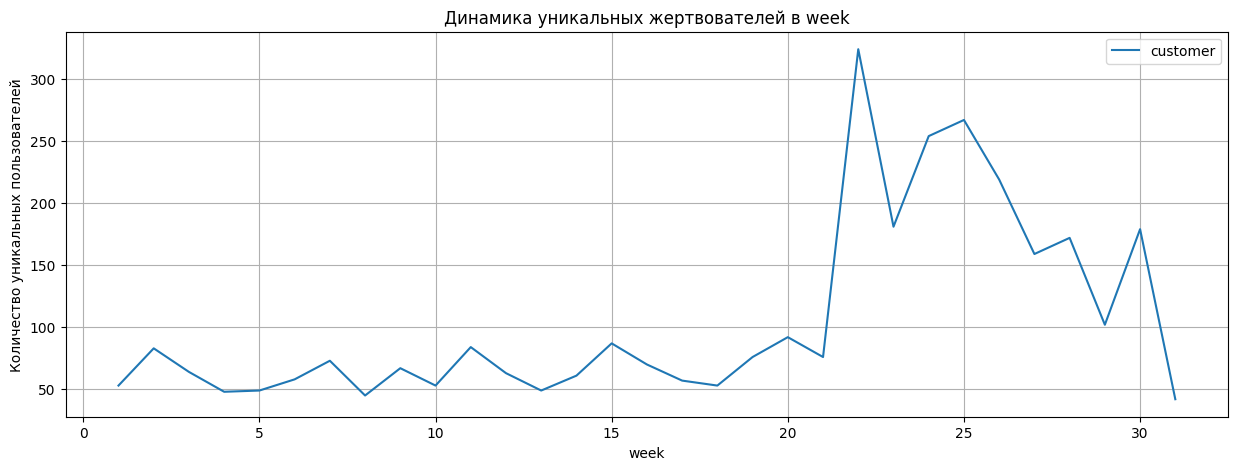

In [197]:
dynamics_plt(completed, 'action_week', 'week')

In [198]:
#sticky factor в процентах по отношению к недельной аудитории

sticky_wau = dau_total / wau_total * 100
sticky_wau

customer    14.263804
dtype: float64

In [199]:
#sticky factor в процентах по отношению к месячной аудитории

sticky_wau = dau_total / mau_total * 100
sticky_wau

customer    3.289474
dtype: float64

##Сохранение файла

In [200]:
#Сохраним файл excel
completed.to_excel('prostieveschi_completed.xlsx', index=False)

In [201]:
completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  3326 non-null   object        
 1   action_date         3326 non-null   datetime64[ns]
 2   action_date2        3326 non-null   object        
 3   month               3326 non-null   object        
 4   bank                3326 non-null   object        
 5   site                3326 non-null   object        
 6   order_id            3326 non-null   float64       
 7   customer            3326 non-null   object        
 8   type                3326 non-null   object        
 9   operation_sum       3326 non-null   int64         
 10  operation_currency  3326 non-null   object        
 11  comission_sum       3326 non-null   float64       
 12  final_sum           3326 non-null   float64       
 13  final_currency      3326 non-null   object      

In [202]:
completed.value_counts('segment')

segment
лояльные         1952
спящие            879
VIP клиенты       362
ушедшие           130
VIP (ушедшие)       3
Name: count, dtype: int64

## Вывод

Мы провели предобработку данных:
1.	Заполнили почти все пропуски в столбце **action_date**, за счет информации из других столбцов с датами.
2.	Оценили пропуски в **order_id** и заполнили маркерными значениями
3.	Исключили из анализируемого датафрейма пропуски в столбцах **comission_sum, final_sum и final_curerncy**
4.	Исключили 1 строку с пропуском в поле клиент
5.	Оценили пропуски по столбцу **city**, их оставили
6.	Привели к общему типу значения в поле **status** (отклонена, завершена)
7.	Проверили данные на наличие дубликатов, обнаружили что есть успешные оплаты, проходившие в один день у одного и того же клиента на одинаковую сумму, но это вероятнее всего не дубликаты.  В одном случае возможно клиент проводил отдельными переводами несколько платежей, в другом случае клиент судя по всему оформил три ежемесячные подписки. В случае с отмененными платежами, дубликаты скорей всего связаны с повторными попытками списаний, которые происходят в течение 3х дней. Их мы исключили, также мы исключили транзакции которые в этот же день в итоге завершились успешным списанием.

По результатам RFM анализа у нас получилось 5 сегментов клиентов
1.	**лояльные** - это клиенты, делавшие пожертвования недавно, до 31 день назад, 1-2 перевода в месяц, суммарных переводов до 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 16 дней, средняя частота перечислений месяц 1.4, количество клиентов в этом сегменте 584. Средний чек 470 руб, общая сумма 729 562 р.
2.	**VIP клиенты** - это клиенты, делавшие пожертвования недавно, до 31 день назад, 1-2 перевода в месяц, суммарных переводов от 5000 руб. до 145 200 руб. У этого сегмента в среднем со дня перечисления прошло около 15 дней, средняя частота перечислений месяц 1.2, количество клиентов в этом сегменте 54. Средний чек почти 2900 руб., общая сумма 638 600 р.
3.	**спящие** - это клиенты, делавшие пожертвования относительно давно, 32-91 день назад, 1-2 перевода в месяц, суммарных переводов до 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 53 дней, средняя частота перечислений в месяц 1, количество клиентов в этом сегменте 748. Средний чек 963 руб, общая сумма 851 462 р.
4.	**ушедшие** - это клиенты, делавшие пожертвования давно, более 91 дней назад, суммарных переводов до 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 135 дней, средняя частота перечислений в месяц 1, количество клиентов в этом сегменте 89. Средний чек 867 руб, общая сумма 93 486 р.
5.	**VIP (ушедшие)** - это клиенты, делавшие пожертвования давно, более 91 дней назад, суммарных переводов более 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 135 дней, средняя частота перечислений в месяц 3, количество клиентов в этом сегменте 1. Средний чек 48 400 руб, общая сумма 145 200р.


Можно отметить, что в июне был всплеск по суммарным пожертвованиям, но это были клиенты из сегменты спящие, и поэтому в июле этих платежей мы уже не наблюдаем.

Также можно отметить что к июлю вырос средний чек у сегмента VIP и до июня рос средний чек у сегмента спящие. Средний чек лояльных клиентов почти не вырос. Здесь можно рекомендовать мотивировать клиентов из сегмента лояльные покупать продукцию фонда, для получения дополнительного финансирования из этого сегмента.
Также важная задача переводить спящих клиентов в лояльных


По результатам коготного анализа можно отметить следующее:

**Самые многочисленные когорты – когорты января, мая и июня.**

**Январская когорта** показывает наивысший уровень удержания клиентов, вероятнее всего это постоянные клиенты, отчислявшие деньги и ранее.  Начиная с марта коэффициент удержания сильно падает. **С февраля по апрель** наименьший размер когорт.

**В мае и июне** пришло много новых клиентов и у них достаточно высокая средняя сумма месячных пожертвований на старте в сравнении с январем и февралем.
**За счет своей многочисленности июньская когорта** принесла **наивысшую выручку в первый месяц** и за два месяца она дает суммарную выручку на уровне 6 месяцев 1й когорты.
Мартовская когорта при ясвоей малочисленности дает высокий LTV, это связано с большим платежом от клиента humblehelptope****@gmail.com на сумму 145 200 руб.
Майская когорта вторая по численности и по прибыльности на старте.
